In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
file_path = 'C:\\Users\\abhin\\Downloads\\Brest.csv'

In [3]:
df=pd.read_csv(file_path)
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208  

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.shape

(569, 33)

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [8]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
564         0.1726                 0.05623     1.1760       1.256   
565         0.1752                 0.05533     0.7655       2.463   
566         0.1590                 0.05648     0.4564       1.075   
567         0.2397                 0.07016     0.7260       1.595   
568         0.1587                 0.05884     0.3857       1.428   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
564            0.02454      0.01114              0.004239        25.450   
565            0.01678      0.01898              0.002498        23.690   
566            0.01557      0.01318              0.003892        18.980   
567            0.01664      0.02324              0.006185        25.740   
568            0.00000      0.02676              0.002783         9.456   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564          26.40           166.10      2027.0           0.14100   
565          38.25           155.00      1731.0           0.11660   
566          34.12           126.70      1124.0           0.11390   
567          39.42           184.60      1821.0           0.16500   
568          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN

In [9]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
col=['id','Unnamed: 32']
df.drop(col,axis=1,inplace=True)

In [12]:
num=df.select_dtypes(include=['number']).columns
cat=df.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['diagnosis'], dtype='object')
num: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Bar plot

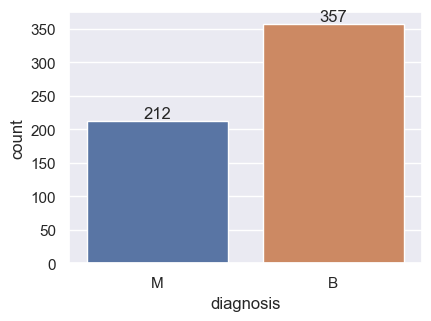

In [13]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat[:1]):
    plt.subplot(4,2,i+1)
    
    ax=sns.countplot(data=df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

# Pie Chart

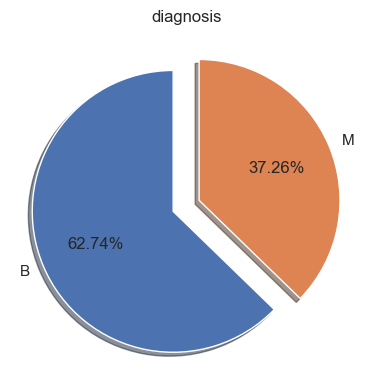

In [14]:
plt.figure(figsize=(10,10))
for i,column in enumerate(cat):
    plt.subplot(1,2,i+1)
    df[column].value_counts()
    Property=df[column].value_counts(normalize=True).keys()
    count=df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,"Count"])
    n=df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

# Numerical Data Analysis

In [15]:
for i in num:
    d_count=round(df[i].count(),2)
    d_max=round(df[i].max(),2)
    d_min=round(df[i].min(),2)
    d_mean=round(df[i].mean(),2)
    d_median=round(df[i].median(),2)
    d_std=round(df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

radius_mean count: 569
radius_mean max: 28.11
radius_mean min: 6.98
radius_mean mean: 14.13
radius_mean median: 13.37
radius_mean std: 3.52
------------------------------------
texture_mean count: 569
texture_mean max: 39.28
texture_mean min: 9.71
texture_mean mean: 19.29
texture_mean median: 18.84
texture_mean std: 4.3
------------------------------------
perimeter_mean count: 569
perimeter_mean max: 188.5
perimeter_mean min: 43.79
perimeter_mean mean: 91.97
perimeter_mean median: 86.24
perimeter_mean std: 24.3
------------------------------------
area_mean count: 569
area_mean max: 2501.0
area_mean min: 143.5
area_mean mean: 654.89
area_mean median: 551.1
area_mean std: 351.91
------------------------------------
smoothness_mean count: 569
smoothness_mean max: 0.16
smoothness_mean min: 0.05
smoothness_mean mean: 0.1
smoothness_mean median: 0.1
smoothness_mean std: 0.01
------------------------------------
compactness_mean count: 569
compactness_mean max: 0.35
compactness_mean min: 0.

In [16]:
for i in num:
    q1=np.quantile(df[i],0.25)
    q2=np.quantile(df[i],0.50)
    q3=np.quantile(df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

radius_mean q1: 11.7
radius_mean q2: 13.37
radius_mean q3: 3
------------
texture_mean q1: 16.17
texture_mean q2: 18.84
texture_mean q3: 3
------------
perimeter_mean q1: 75.17
perimeter_mean q2: 86.24
perimeter_mean q3: 3
------------
area_mean q1: 420.3
area_mean q2: 551.1
area_mean q3: 3
------------
smoothness_mean q1: 0.08637
smoothness_mean q2: 0.09587
smoothness_mean q3: 3
------------
compactness_mean q1: 0.06492
compactness_mean q2: 0.09263
compactness_mean q3: 3
------------
concavity_mean q1: 0.02956
concavity_mean q2: 0.06154
concavity_mean q3: 3
------------
concave points_mean q1: 0.02031
concave points_mean q2: 0.0335
concave points_mean q3: 3
------------
symmetry_mean q1: 0.1619
symmetry_mean q2: 0.1792
symmetry_mean q3: 3
------------
fractal_dimension_mean q1: 0.0577
fractal_dimension_mean q2: 0.06154
fractal_dimension_mean q3: 3
------------
radius_se q1: 0.2324
radius_se q2: 0.3242
radius_se q3: 3
------------
texture_se q1: 0.8339
texture_se q2: 1.108
texture_se q

In [17]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

# Histogram

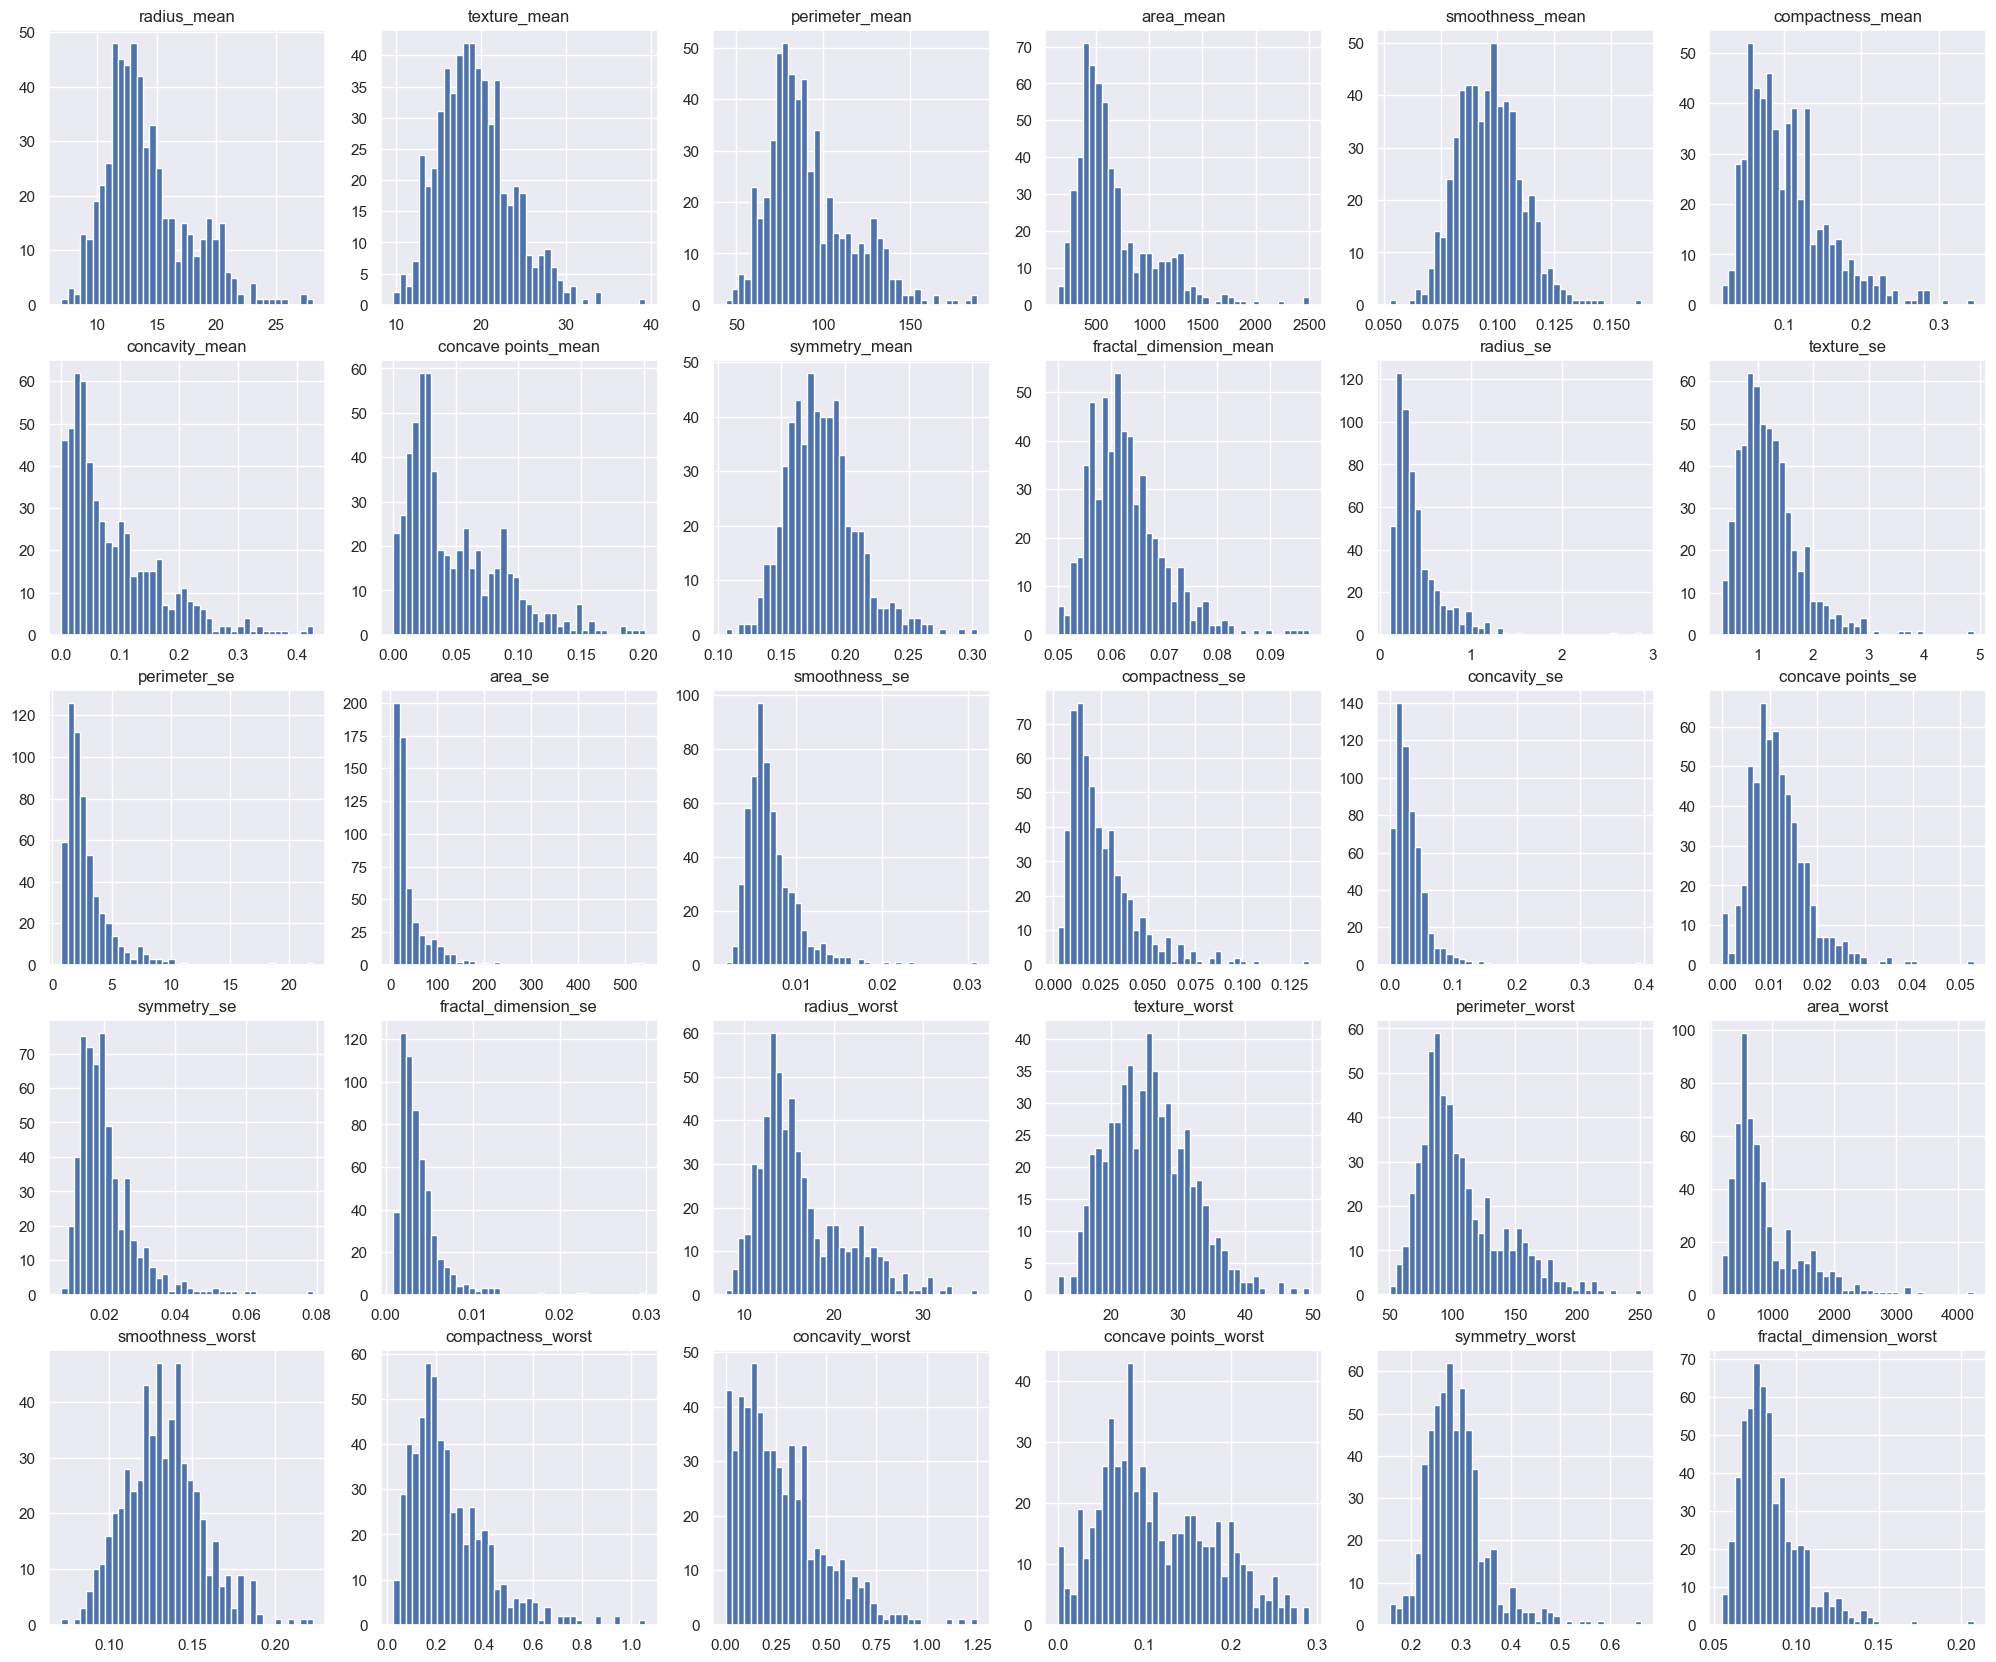

In [18]:
plt.figure(figsize=(25,25))
for i,column in enumerate(num):
    plt.subplot(6,6,i+1)
    plt.title(column)
    plt.hist(df[column],bins=40)
plt.show()

In [19]:
num

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

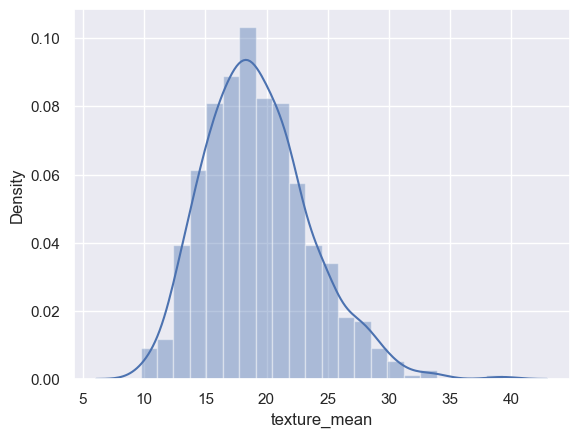

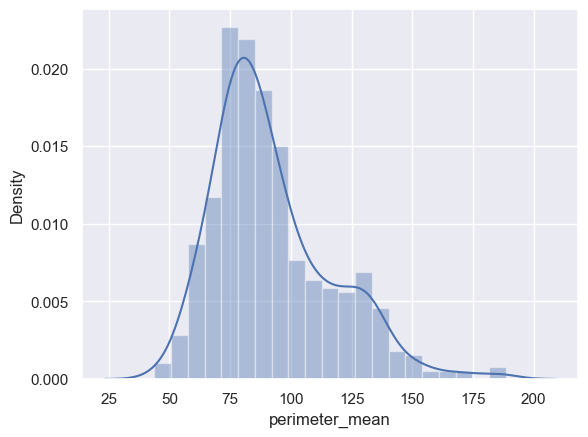

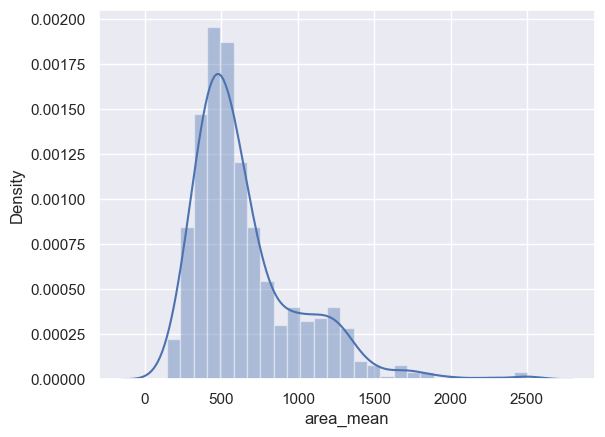

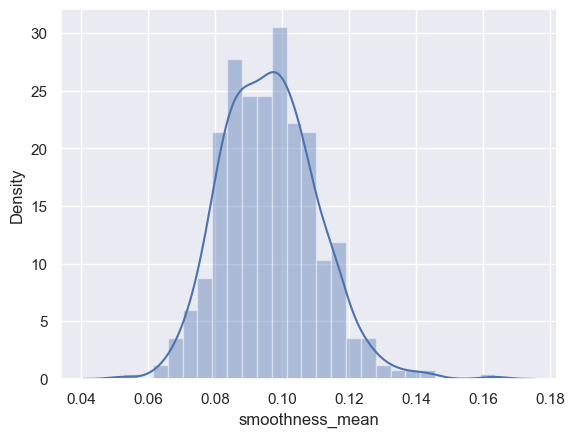

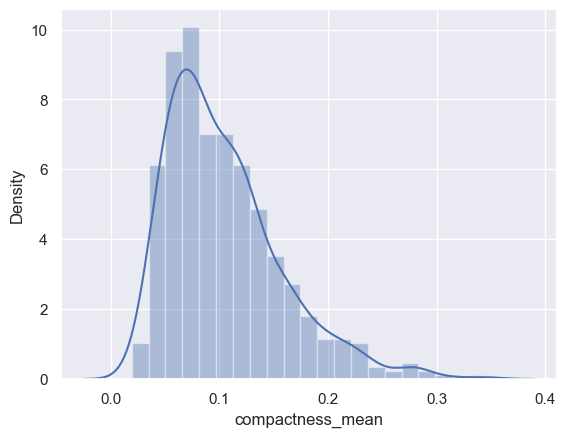

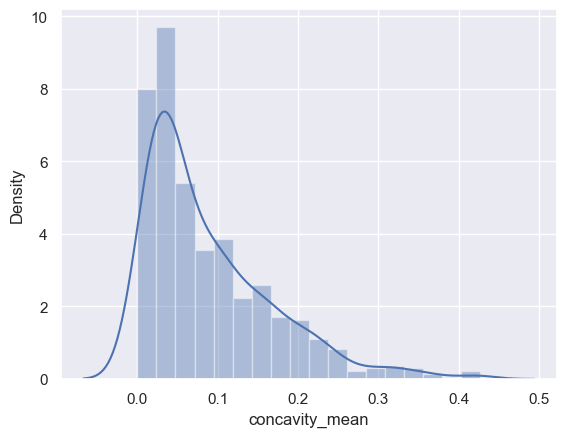

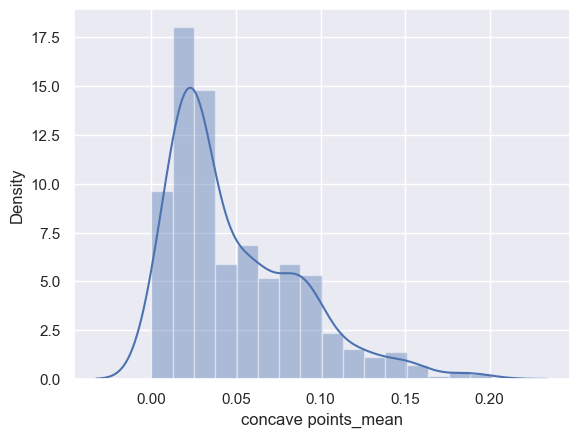

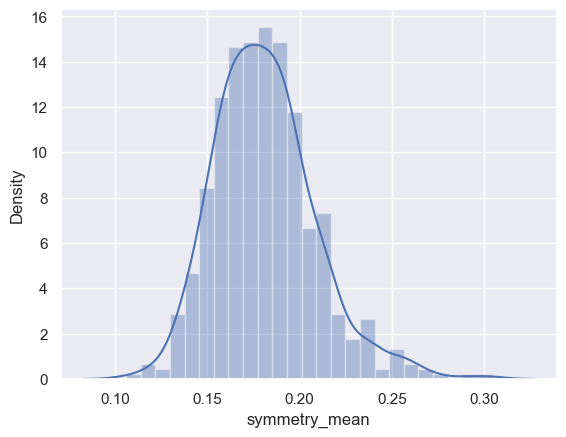

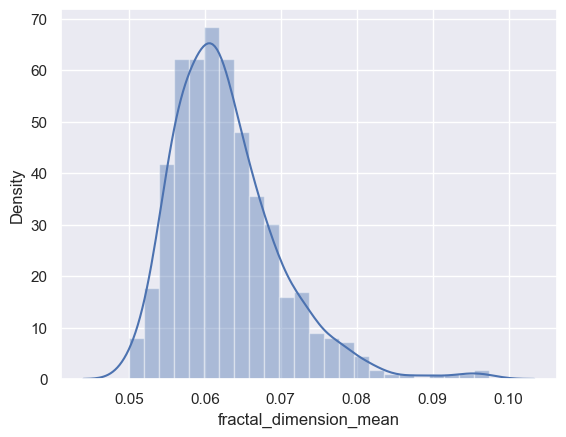

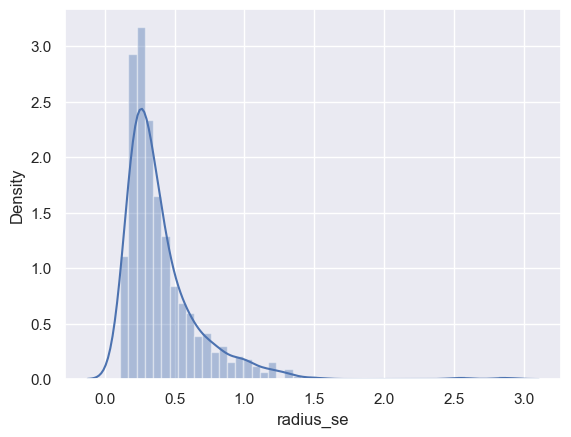

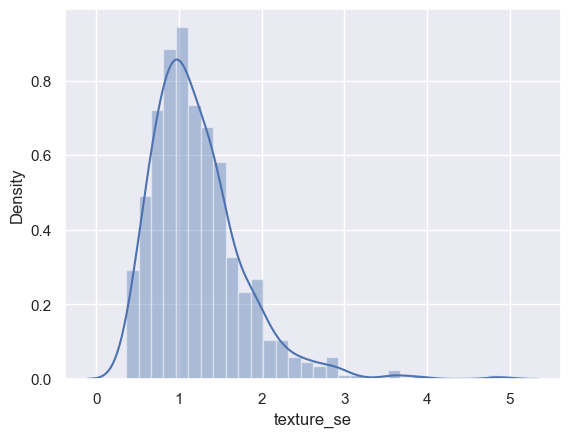

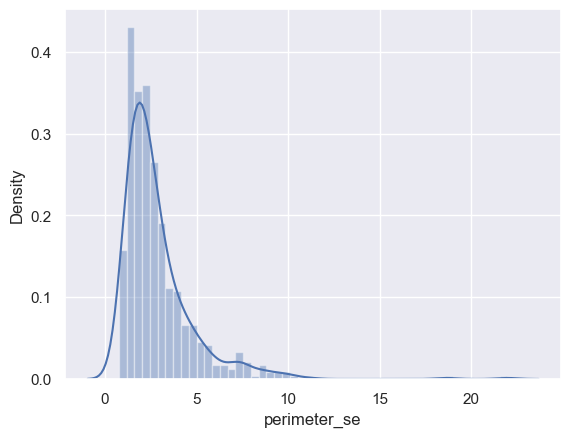

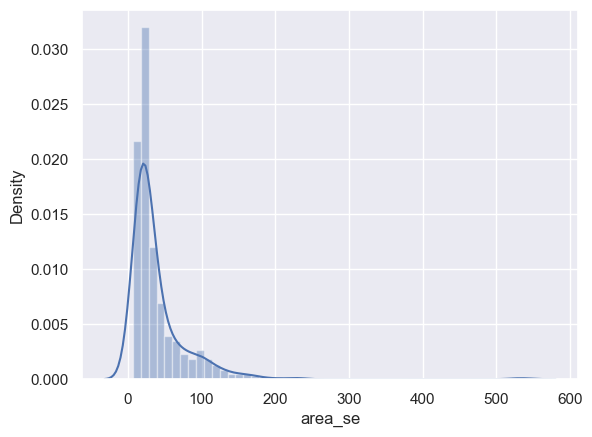

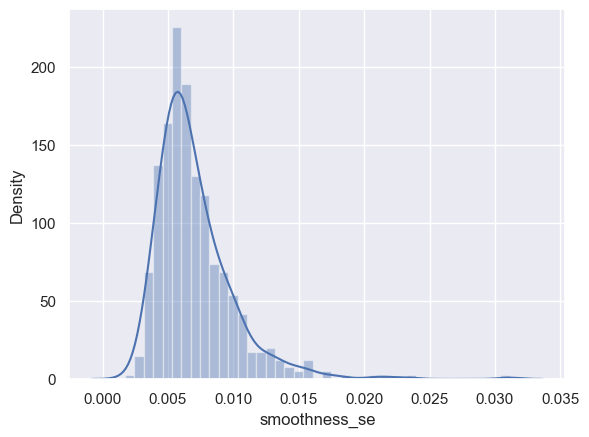

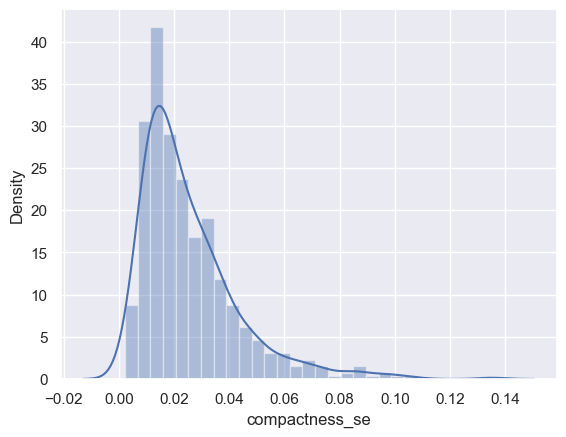

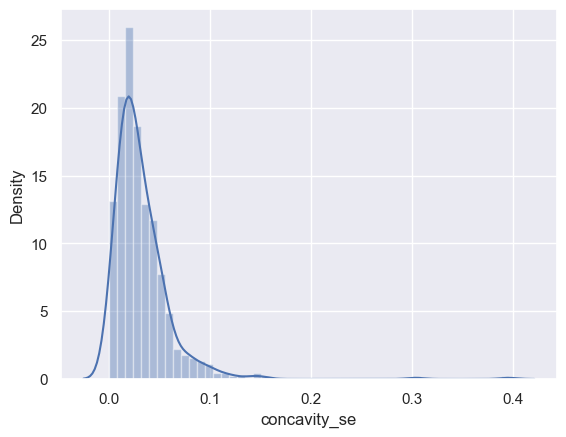

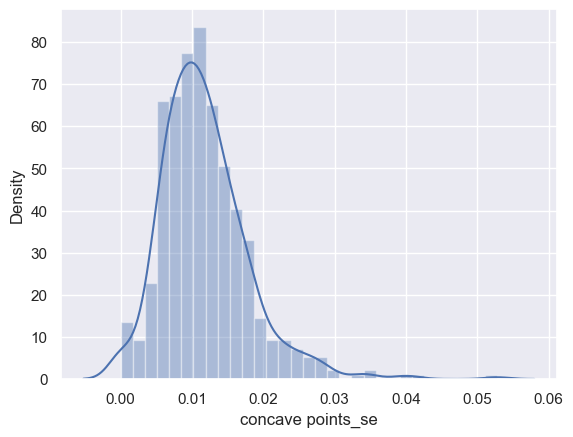

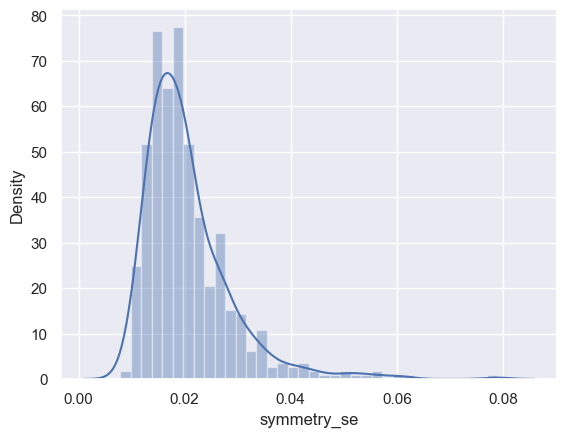

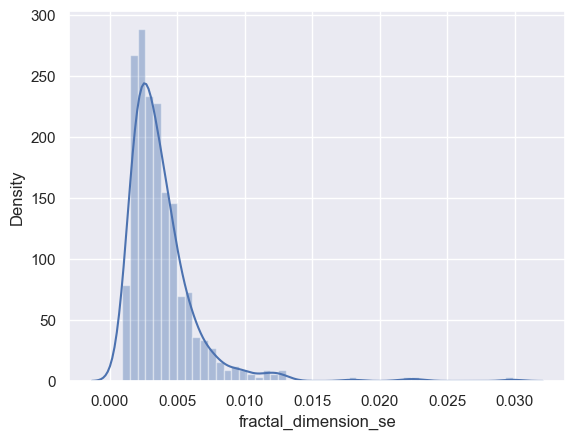

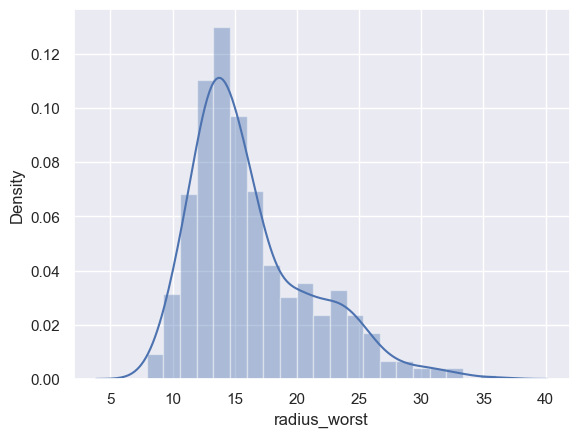

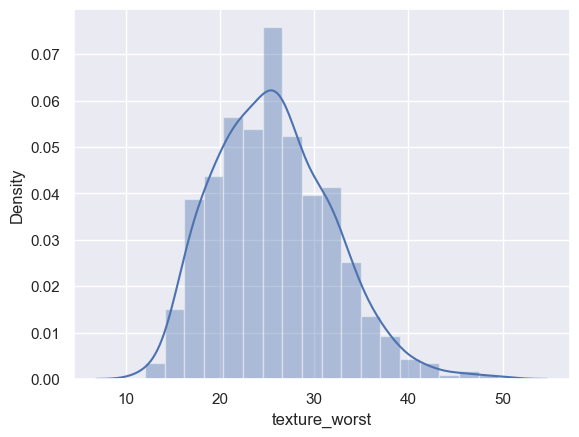

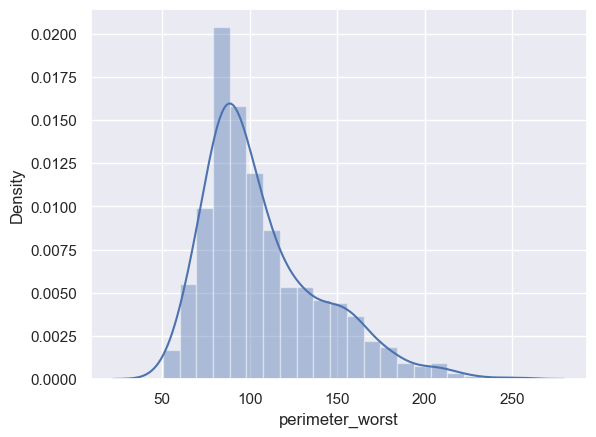

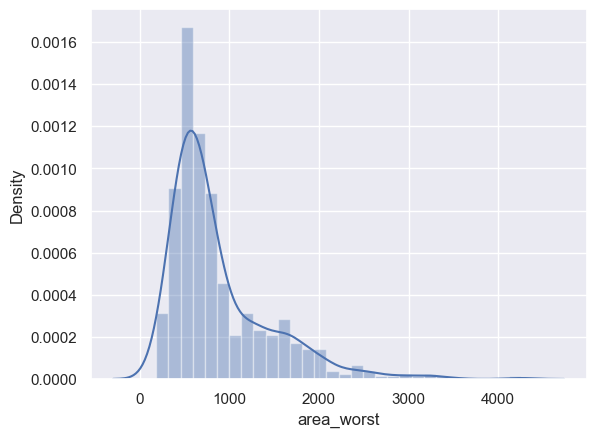

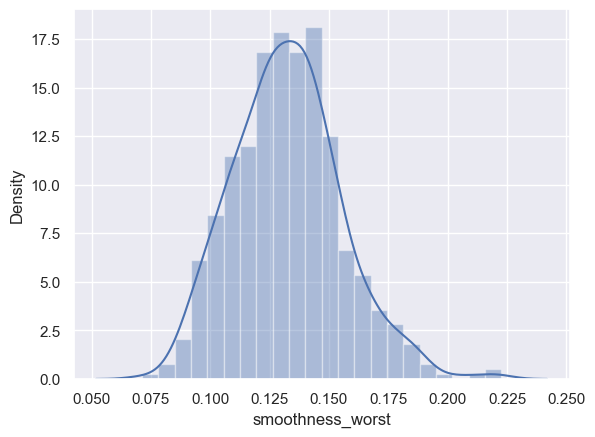

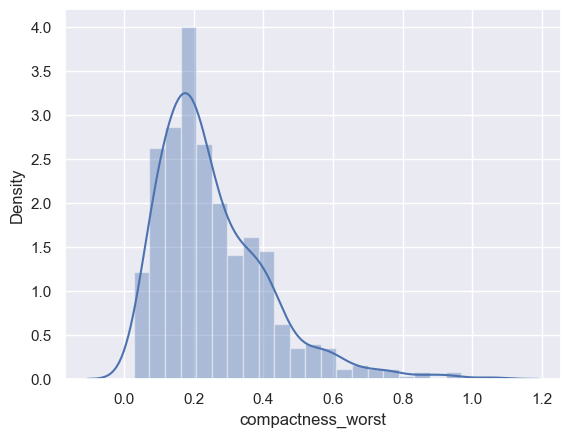

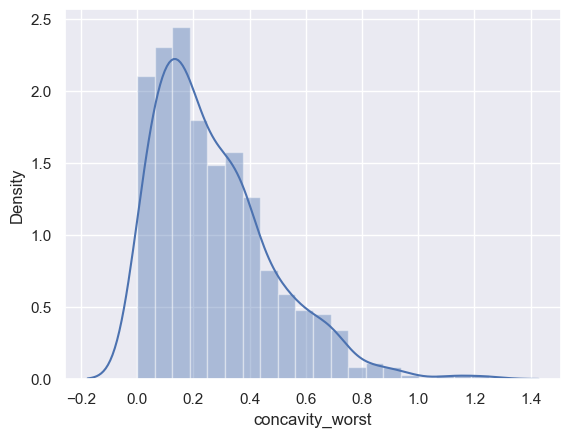

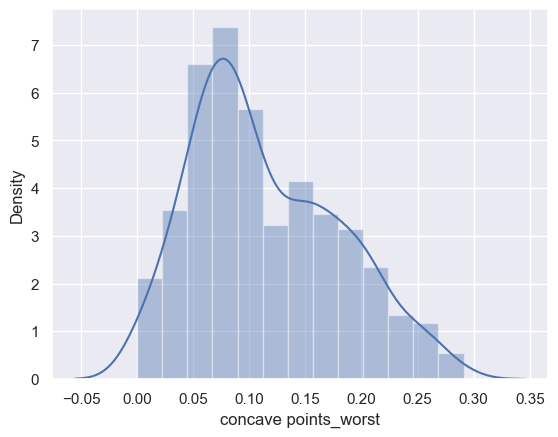

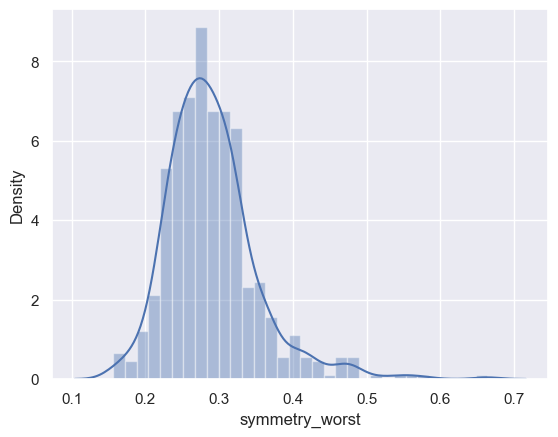

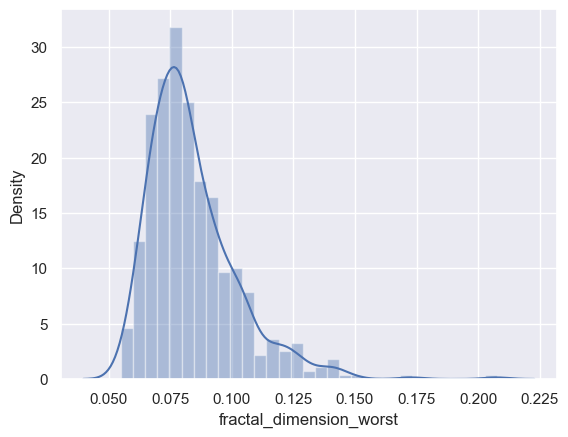

In [20]:
for i in num[1:]:
    sns.distplot(df[i])
    plt.show()

# Box Plot

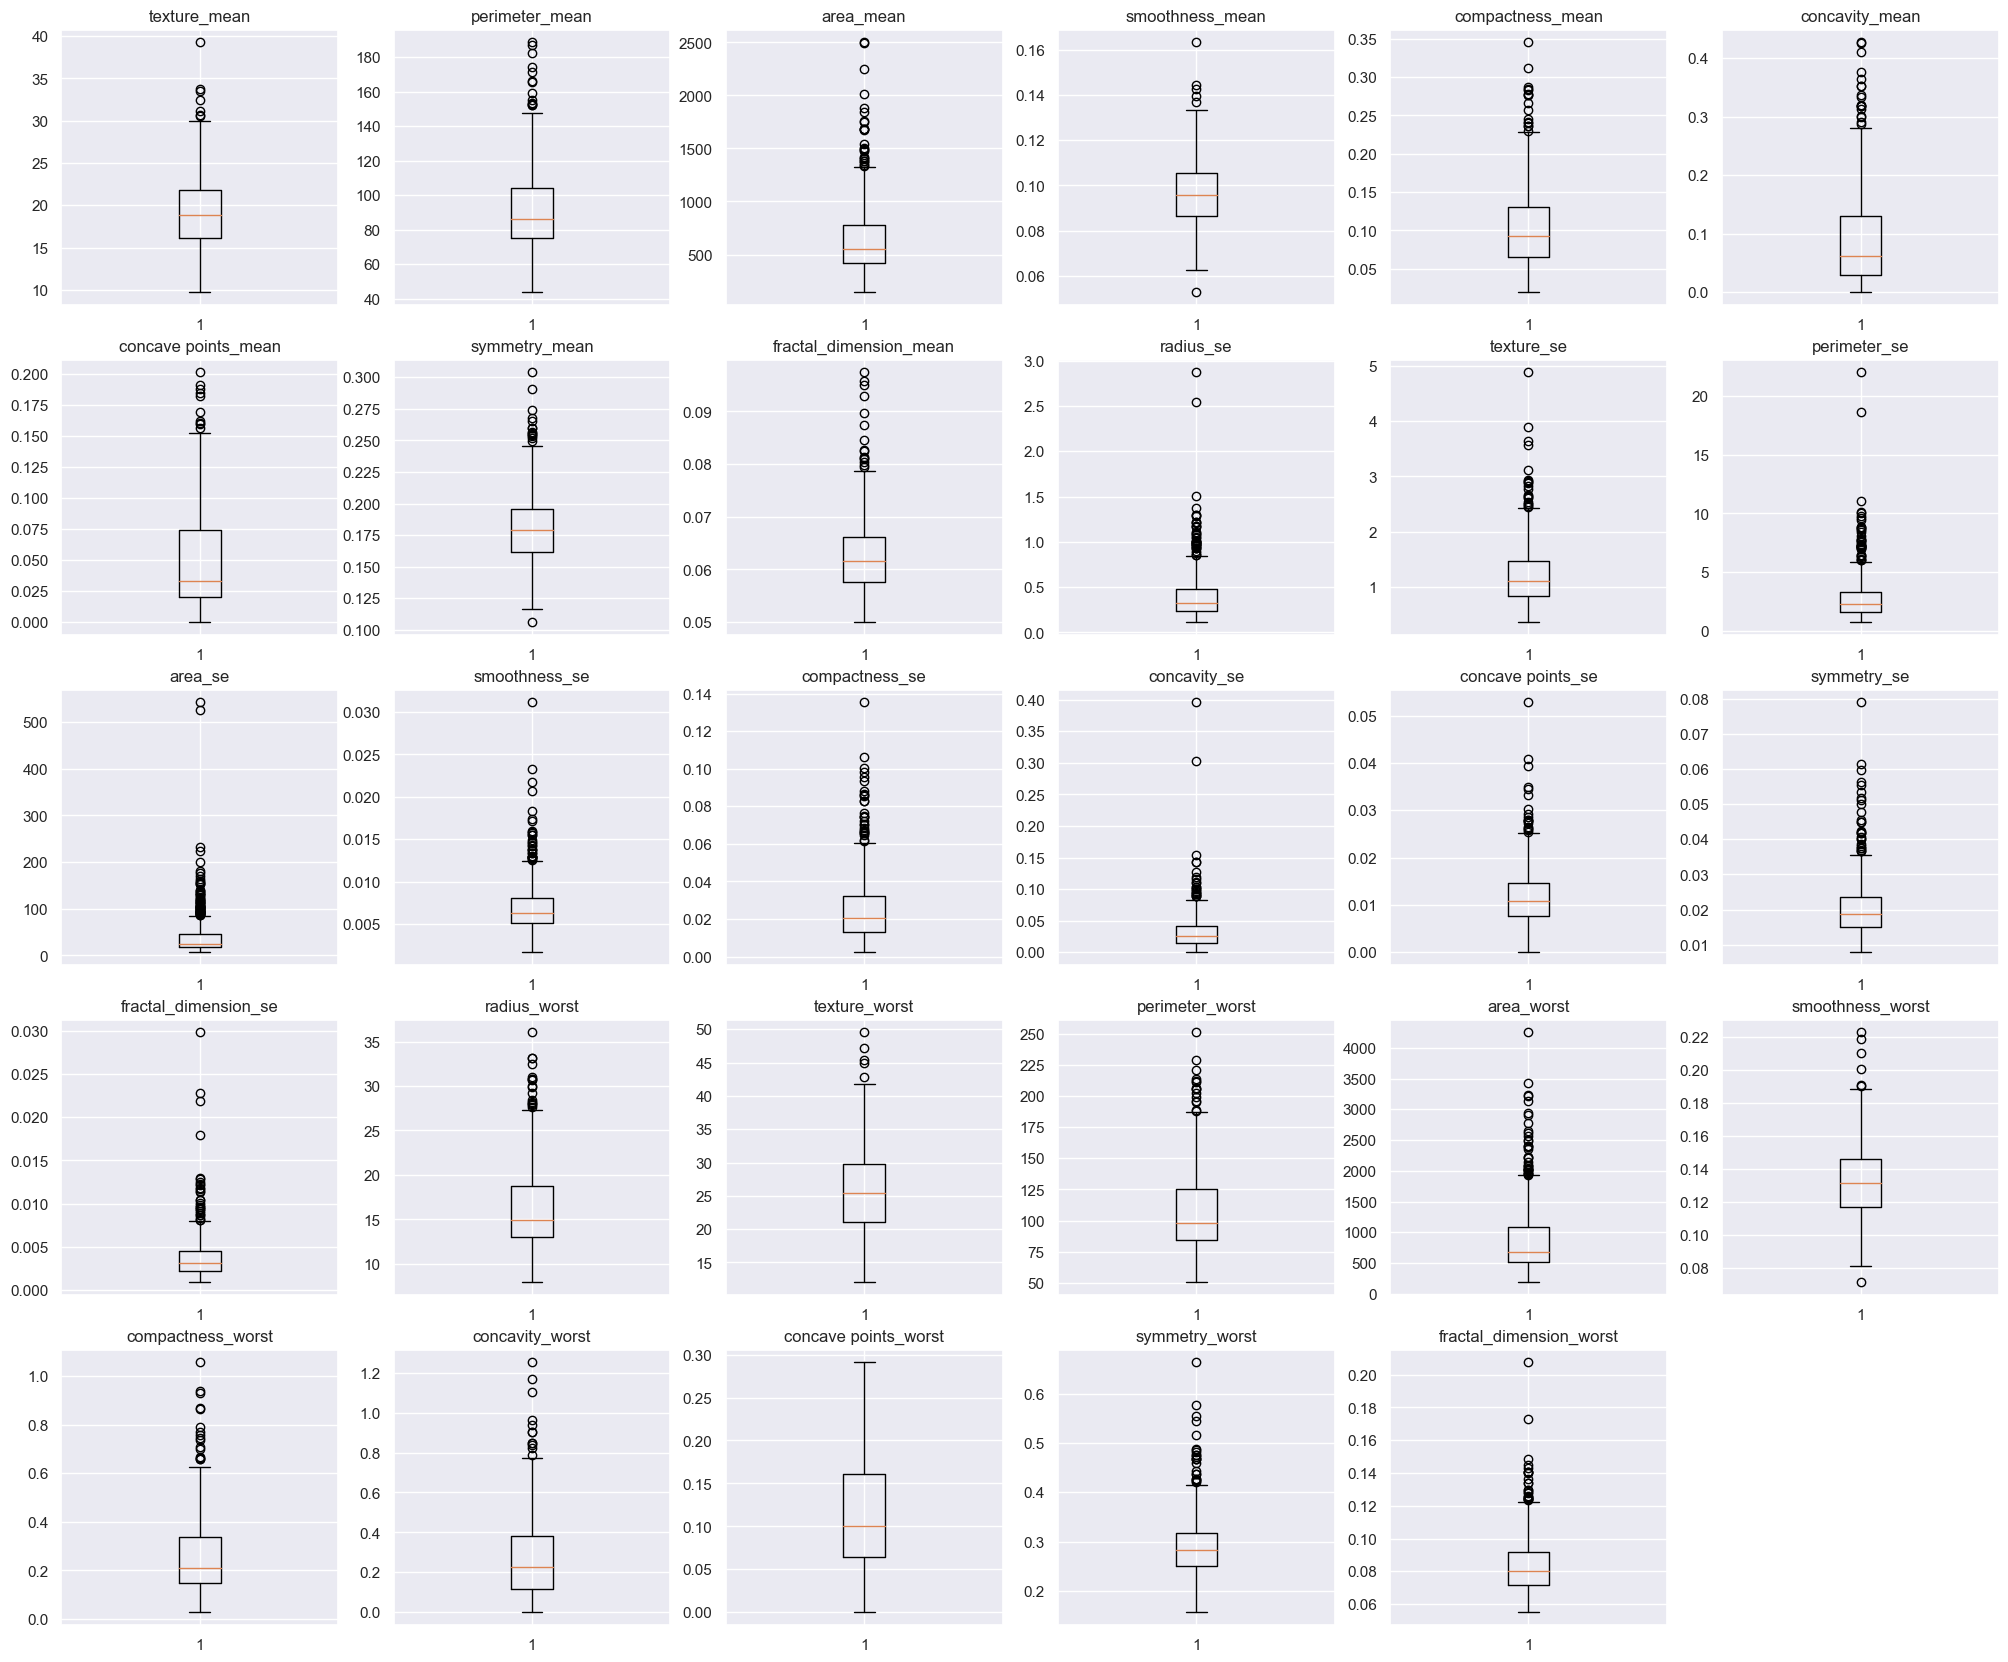

In [21]:
plt.figure(figsize=(25,25))
for i,column in enumerate(num[1:]):
    plt.subplot(6,6,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

In [22]:
for i in df:
    a=df[i].nunique()
    print(i,a)

diagnosis 2
radius_mean 456
texture_mean 479
perimeter_mean 522
area_mean 539
smoothness_mean 474
compactness_mean 537
concavity_mean 537
concave points_mean 542
symmetry_mean 432
fractal_dimension_mean 499
radius_se 540
texture_se 519
perimeter_se 533
area_se 528
smoothness_se 547
compactness_se 541
concavity_se 533
concave points_se 507
symmetry_se 498
fractal_dimension_se 545
radius_worst 457
texture_worst 511
perimeter_worst 514
area_worst 544
smoothness_worst 411
compactness_worst 529
concavity_worst 539
concave points_worst 492
symmetry_worst 500
fractal_dimension_worst 535


In [23]:
df.shape

(569, 31)

In [24]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [25]:
#pd.DataFrame(num)

In [26]:
def median_imputed(num):
    q1=np.quantile(num[i],0.25)
    q2=np.quantile(num[i],0.50)
    q3=np.quantile(num[i],0.75)

    Iqr=q3-q1
    ub=q3+(1.5*Iqr)
    lb=q1-(1.5*Iqr)
    con1=num[i]>ub
    con2=num[i]<lb
    outliers_df=df[con1|con2]
    new_values=[]
    median=round(num[i].mode()[0])

    df[num] = np.clip(num[i], lb, ub)
    
    for i in num[i].values:
        if i>ub or i<lb:
            
            new_values.append(median)
        else:
            new_values.append(i)

    df[f'{col}_imputed'] = new_values

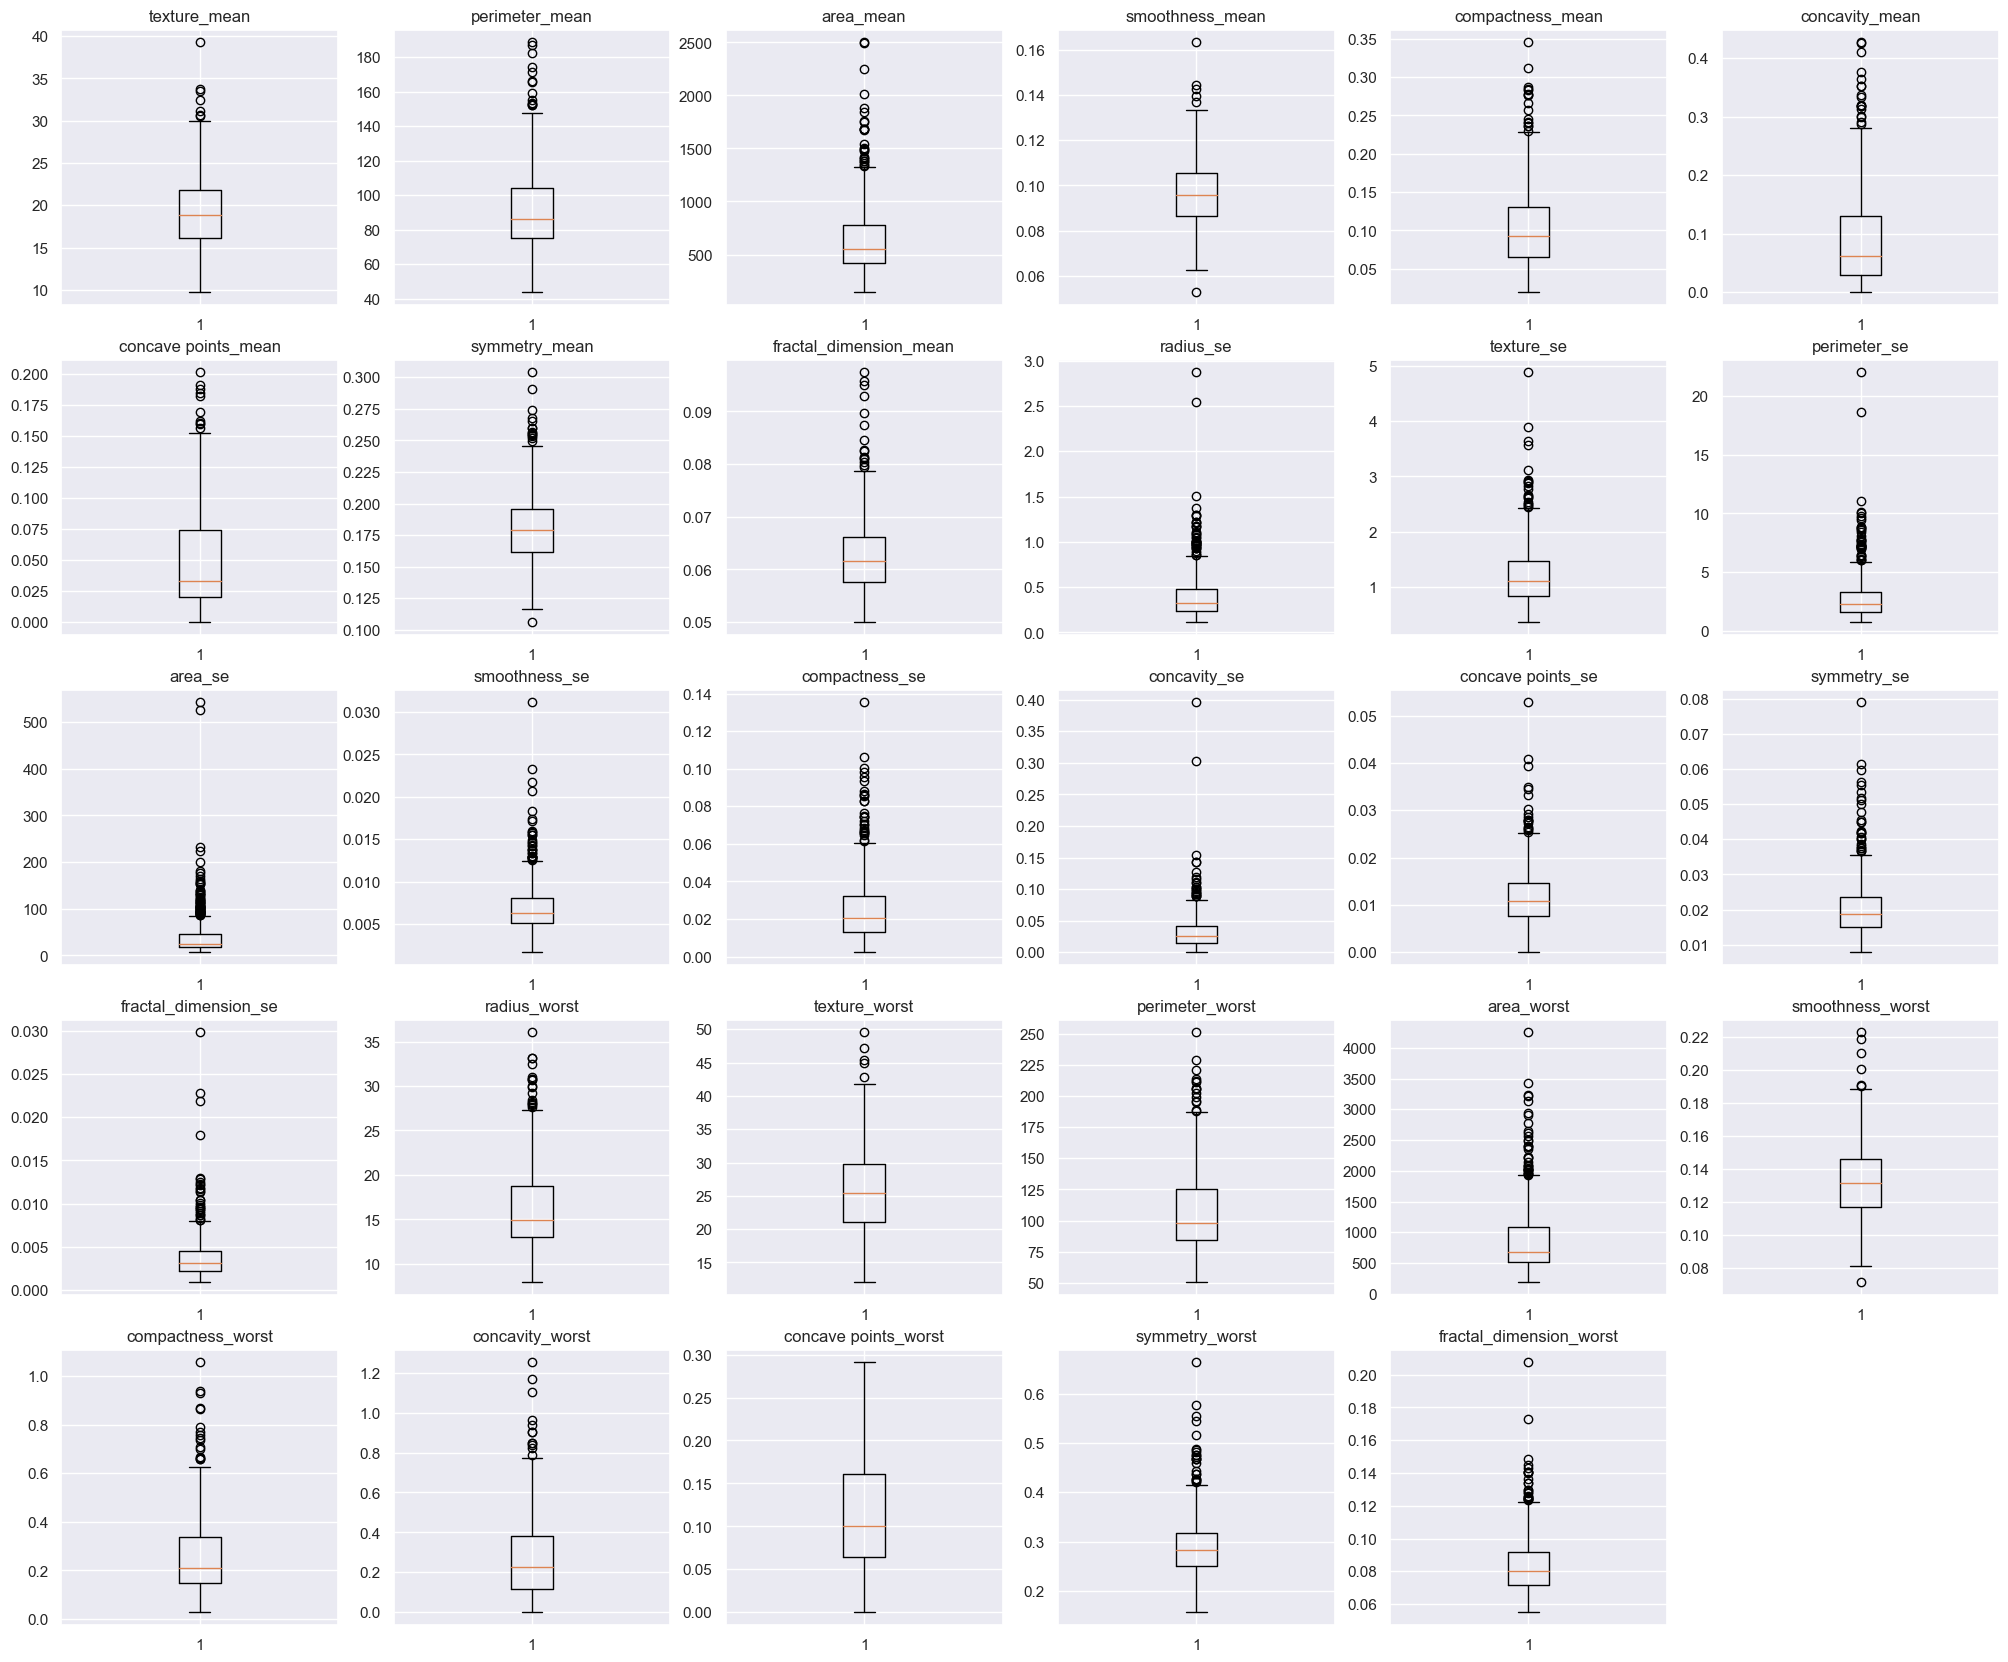

In [27]:
plt.figure(figsize=(25,25))
for i,column in enumerate(num[1:]):
    plt.subplot(6,6,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

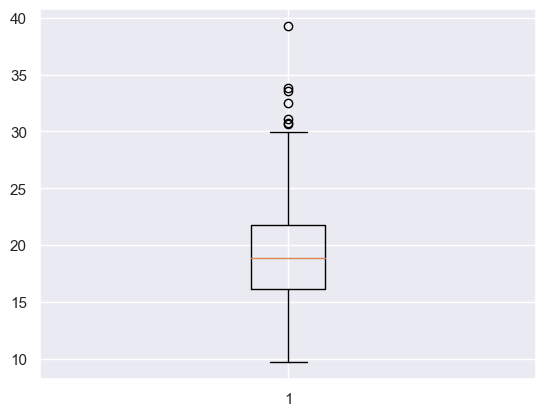

In [28]:
plt.boxplot(df['texture_mean'])
plt.show()


In [29]:
q1=np.quantile(df['texture_mean'],0.25)
q2=np.quantile(df['texture_mean'],0.50)
q3=np.quantile(df['texture_mean'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=df['texture_mean']>ub1
con2=df['texture_mean']<lb1
outlier=df[con1|con2]
len(outlier)

7

In [30]:
import numpy as np

def replace_outliers(column):
    # Convert column to numeric type, coercing errors to NaN
    column = pd.to_numeric(column, errors='coerce')
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    
    # Apply conditions only to numeric values
    column[(column < lb) | (column > ub)] = np.nan
    
    # Fill NaN values with the median of the column
    column.fillna(column.median(), inplace=True)

# Apply the replace_outliers function to each column
for column in df.columns:
    replace_outliers(df[column])



In [31]:
# import numpy as np

# def replace_outliers(column):
#     # Convert column to numeric type, coercing errors to NaN
#     column = pd.to_numeric(column, errors='coerce')
    
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1
#     lb = Q1 - 1.5 * IQR
#     ub = Q3 + 1.5 * IQR
    
#     # Apply conditions only to numeric values
#     column[(column < lb) | (column > ub)] = np.nan
    
#     # Fill NaN values with the median of the column
#     a=np.clip(df[num],lb,ub)

# # Apply the replace_outliers function to each column
# for column in df.columns:
#     replace_outliers(df[column])


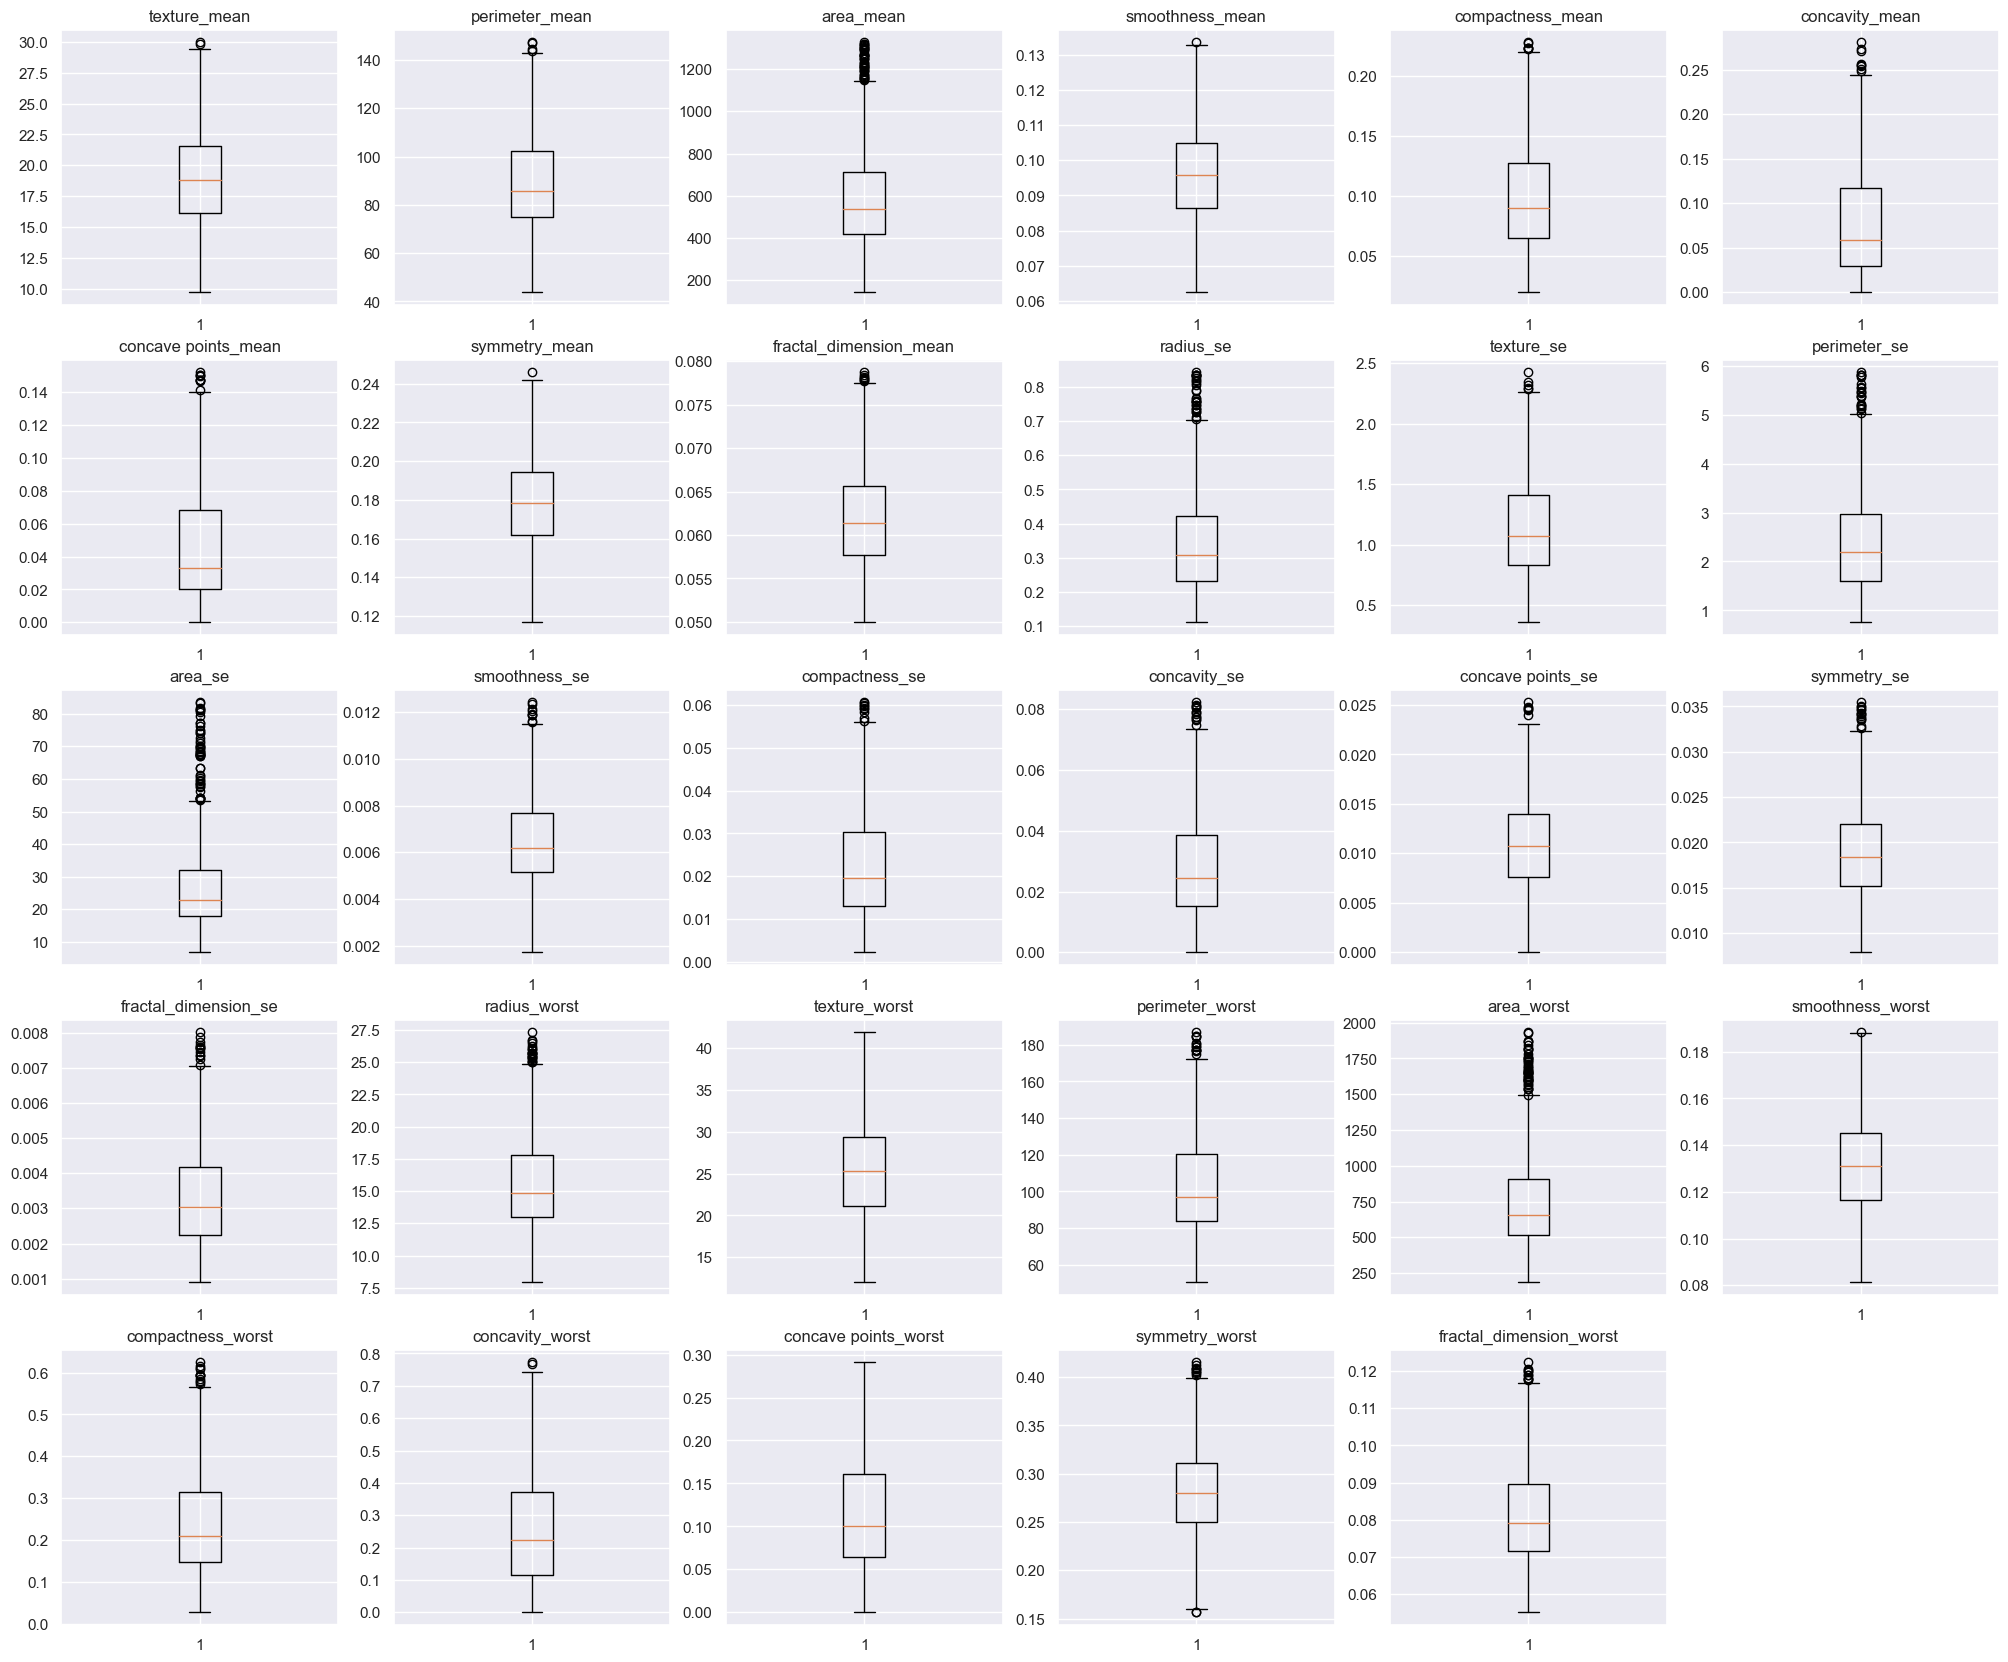

In [32]:
plt.figure(figsize=(25,25))
for i,column in enumerate(num[1:]):
    plt.subplot(6,6,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

In [33]:
v=(len(outlier)/len(df))*100
v

1.2302284710017575

In [34]:
df["texture_mean"]=np.clip(df['texture_mean'],lb1,ub1)

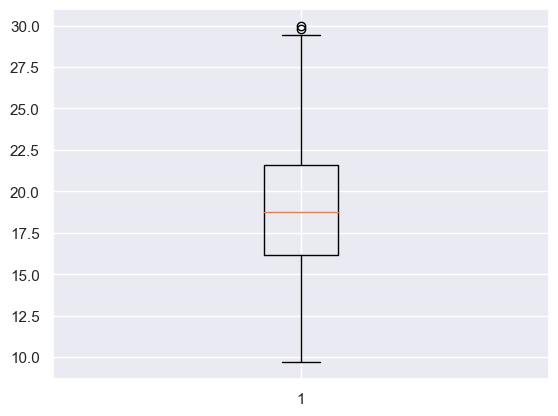

In [35]:
plt.boxplot(df['texture_mean'])
plt.show()


In [36]:
cat

Index(['diagnosis'], dtype='object')

In [37]:
col=pd.DataFrame(df['diagnosis'])

In [38]:
col

diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]

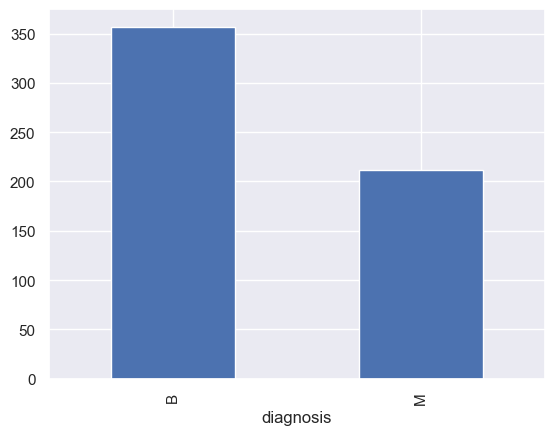

In [39]:
col['diagnosis'].value_counts().plot(kind='bar')
plt.show()

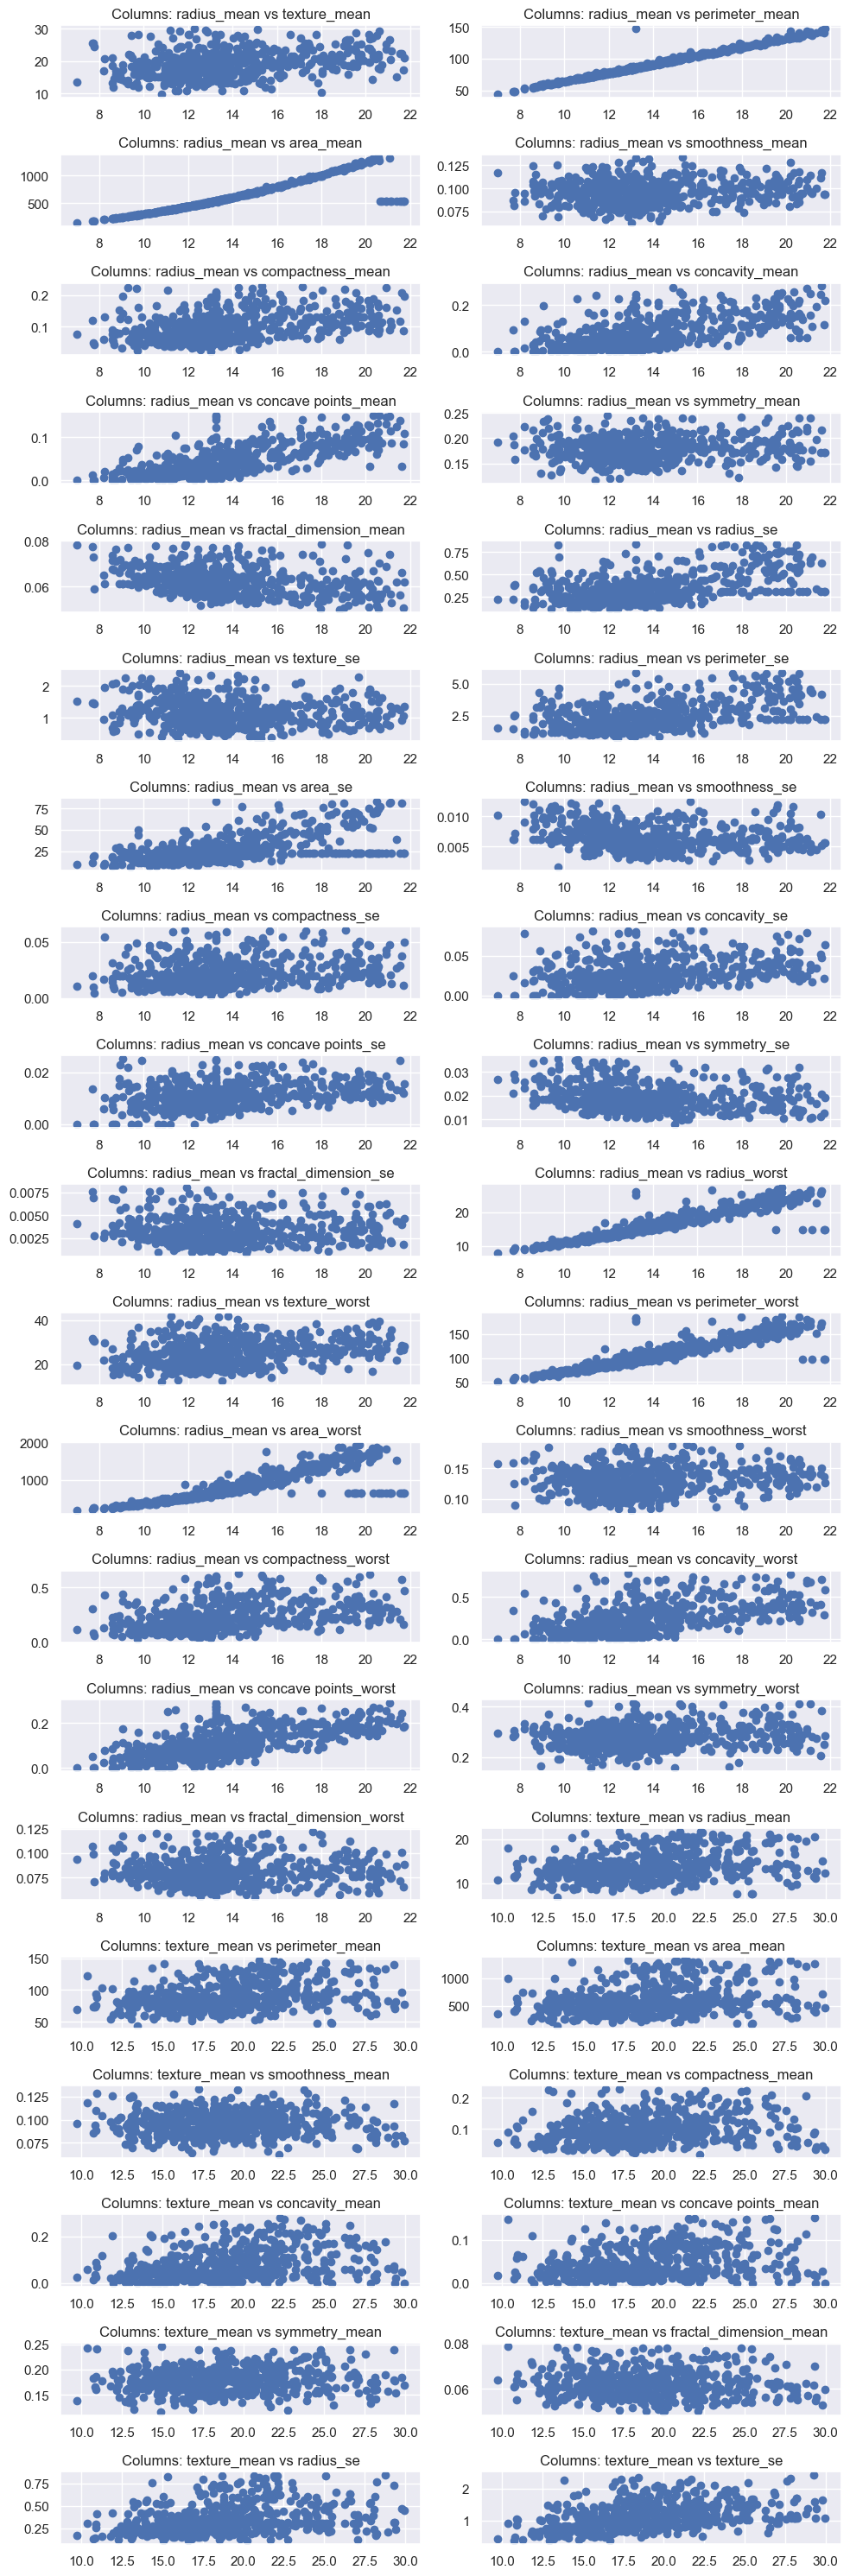

In [40]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 20 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(20, 2, figsize=(10, 30))  

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(df[i], df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Correlation

In [41]:
corr = df.corr(numeric_only=True)
corr

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.296445        0.990189   0.922621   
texture_mean                0.296445      1.000000        0.305822   0.302391   
perimeter_mean              0.990189      0.305822        1.000000   0.914280   
area_mean                   0.922621      0.302391        0.914280   1.000000   
smoothness_mean             0.133982      0.011457        0.175014   0.123209   
compactness_mean            0.416081      0.205283        0.468572   0.381297   
concavity_mean              0.619970      0.305284        0.662196   0.579812   
concave points_mean         0.739315      0.275928        0.779735   0.695344   
symmetry_mean               0.131832      0.110336        0.163549   0.135683   
fractal_dimension_mean     -0.290757     -0.054760       -0.241266  -0.264235   
radius_se                   0.508834      0.281675        0.509658   0.542807   
texture_se                 -0.105637      0.393294       -0.101475  -0.088426   
perimeter_se                0.504626      0.293526        0.513002   0.535869   
area_se                     0.559137      0.276893        0.553788   0.555737   
smoothness_se              -0.202872      0.085146       -0.187219  -0.161254   
compactness_se              0.249575      0.215038        0.289344   0.240813   
concavity_se                0.338127      0.247659        0.375018   0.326474   
concave points_se           0.356462      0.174005        0.387648   0.338995   
symmetry_se                -0.226811      0.014744       -0.215396  -0.177207   
fractal_dimension_se        0.015758      0.140698        0.056749   0.029884   
radius_worst                0.929658      0.325911        0.925113   0.911907   
texture_worst               0.279691      0.889813        0.285742   0.279887   
perimeter_worst             0.916407      0.335107        0.917606   0.901383   
area_worst                  0.845914      0.333663        0.842552   0.888706   
smoothness_worst            0.126380      0.079391        0.156239   0.127616   
compactness_worst           0.399915      0.216820        0.444341   0.374548   
concavity_worst             0.535548      0.295383        0.574371   0.493601   
concave points_worst        0.666621      0.289314        0.702832   0.614794   
symmetry_worst              0.167858      0.072618        0.185790   0.183549   
fractal_dimension_worst     0.036791      0.074159        0.082442   0.045951   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.133982          0.416081        0.619970   
texture_mean                    0.011457          0.205283        0.305284   
perimeter_mean                  0.175014          0.468572        0.662196   
area_mean                       0.123209          0.381297        0.579812   
smoothness_mean                 1.000000          0.587074        0.448928   
compactness_mean                0.587074          1.000000        0.805150   
concavity_mean                  0.448928          0.805150        1.000000   
concave points_mean             0.511205          0.737546        0.868809   
symmetry_mean                   0.500316          0.488252        0.405552   
fractal_dimension_mean          0.542511          0.423583        0.214443   
radius_se                       0.266588          0.375075        0.454956   
texture_se                      0.098269          0.034362        0.035290   
perimeter_se                    0.262640          0.450189        0.518920   
area_se                         0.199469          0.325372        0.447697   
smoothness_se                   0.291873          0.120155        0.079089   
compactness_se                  0.336004          0.674135        0.567376   
concavity_se                    0.294567          0.629752        0.672669   
concave points_se               0.401183          0.638790        0.630640   
symmetry_se                    

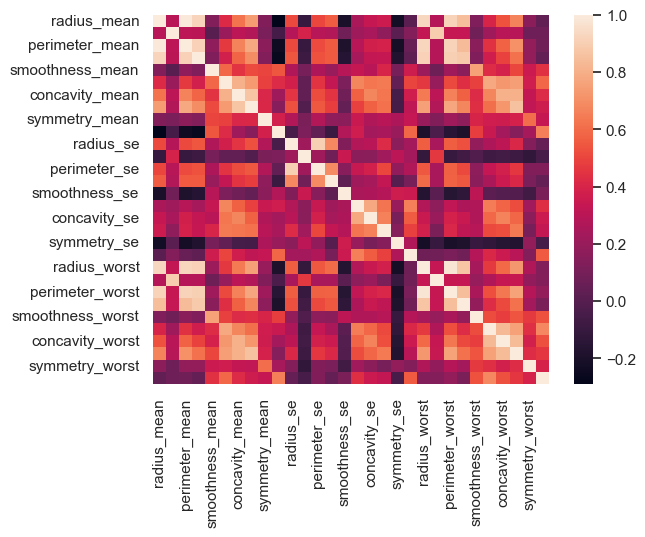

In [42]:
sns.heatmap(corr,annot=False)
plt.show()

In [43]:
for i in (num):
    print(i,df[i].skew())

radius_mean 0.6273194166282767
texture_mean 0.364754111345082
perimeter_mean 0.66278474244786
area_mean 1.0127392156957638
smoothness_mean 0.19224133657125772
compactness_mean 0.7585986841156187
concavity_mean 0.9658986021639688
concave points_mean 0.9470022569992211
symmetry_mean 0.25343123105591936
fractal_dimension_mean 0.5821338610755121
radius_se 1.1373066156279144
texture_se 0.5756017150561922
perimeter_se 1.0639883296063486
area_se 1.6003691471719141
smoothness_se 0.6315449556212266
compactness_se 0.9328473522862604
concavity_se 0.8122665723652248
concave points_se 0.3249706341643451
symmetry_se 0.7774070367225232
fractal_dimension_se 0.8901960725839101
radius_worst 0.8226019726776054
texture_worst 0.290925702482264
perimeter_worst 0.8415792341313713
area_worst 1.1926892204605835
smoothness_worst 0.18262139840564698
compactness_worst 0.830322782732563
concavity_worst 0.7410458055529869
concave points_worst 0.49261552688550875
symmetry_worst 0.2577611395212574
fractal_dimension_w

In [44]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00      537.3   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.09009         0.05892              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.09579           0.09009         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.09009         0.05892              0.15200   
568          0.09579           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                0.078710     0.3077      0.9053   
1           0.1812                0.056670     0.5435      0.7339   
2           0.2069                0.059990     0.7456      0.7869   
3           0.1783                0.061325     0.4956      1.1560   
4           0.1809                0.058830     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                0.056230     0.3077      1.2560   
565         0.1752                0.055330     0.7655      1.0750   
566         0.1590                0.056480     0.4564      1.0750   
567         0.2397                0.070160     0.7260      1.5950   
568         0.1587                0.058840     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           2.203    22.79       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    22.79       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.01952       0.05661   
4           5.438    22.79       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         2.203    22.79       0.010300         0.02891       0.05198   
565         5.203    22.79       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    22.79       0.006522         0.01952       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587     0.030030              0.006193        25.380   
1              0.01340     0.013890              0.003532        24.990   
2              0.02058     0.022500              0.004571        23.570   
3              0.01867     0.018435              0.003040        14.910   
4              0.01885     0.017560              0.005115        22.540   
..                 ...

# Convert Categorical to numerical

In [45]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [46]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00      537.3   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.09009         0.05892              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.09579           0.09009         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.09009         0.05892              0.15200   
568          0.09579           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                0.078710     0.3077      0.9053   
1           0.1812                0.056670     0.5435      0.7339   
2           0.2069                0.059990     0.7456      0.7869   
3           0.1783                0.061325     0.4956      1.1560   
4           0.1809                0.058830     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                0.056230     0.3077      1.2560   
565         0.1752                0.055330     0.7655      1.0750   
566         0.1590                0.056480     0.4564      1.0750   
567         0.2397                0.070160     0.7260      1.5950   
568         0.1587                0.058840     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           2.203    22.79       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    22.79       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.01952       0.05661   
4           5.438    22.79       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         2.203    22.79       0.010300         0.02891       0.05198   
565         5.203    22.79       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    22.79       0.006522         0.01952       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587     0.030030              0.006193        25.380   
1              0.01340     0.013890              0.003532        24.990   
2              0.02058     0.022500              0.004571        23.570   
3              0.01867     0.018435              0.003040        14.910   
4              0.01885     0.017560              0.005115        22.540   
..         

# Machine learning 

In [47]:
X= df.drop('diagnosis',axis=1)
y= df['diagnosis']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [50]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(569, 31)
(455, 30)
(114, 30)
(455,)
(114,)


# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred_dt=dtree.predict(X_test)

In [53]:
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1])

In [54]:
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [55]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 89.47
F1 is: 0.86
Precision is: 0.9
Recall is: 0.82
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        69
           1       0.90      0.82      0.86        45

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



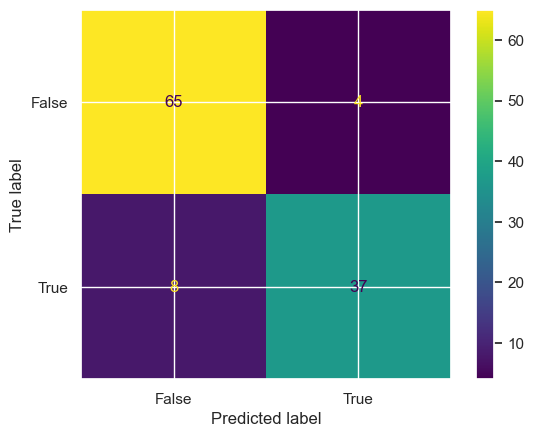

In [56]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 65
False postive: 4
False negative: 8
True postive: 37


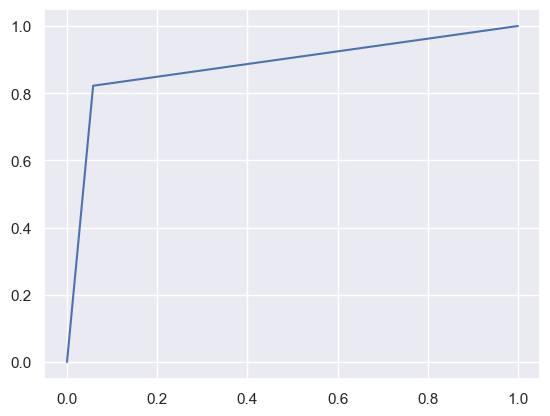

In [58]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred_log=logtree.predict(X_test)

In [61]:
y_pred_log

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0])

In [62]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)
print(classification_report(y_test,y_pred_log))

accuray is: 86.84
F1 is: 0.82
Precision is: 0.89
Recall is: 0.76
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        69
           1       0.89      0.76      0.82        45

    accuracy                           0.87       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.87      0.87      0.87       114



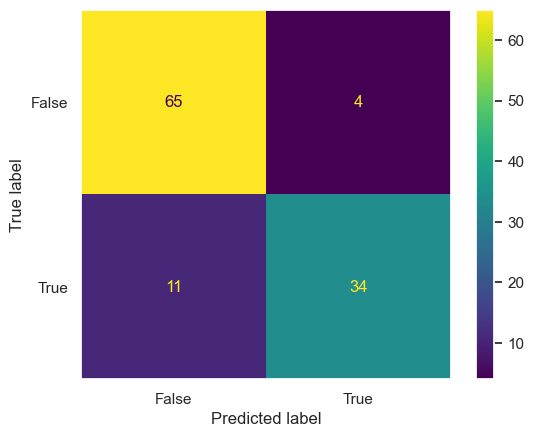

In [63]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [64]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 65
False postive: 4
False negative: 11
True postive: 34


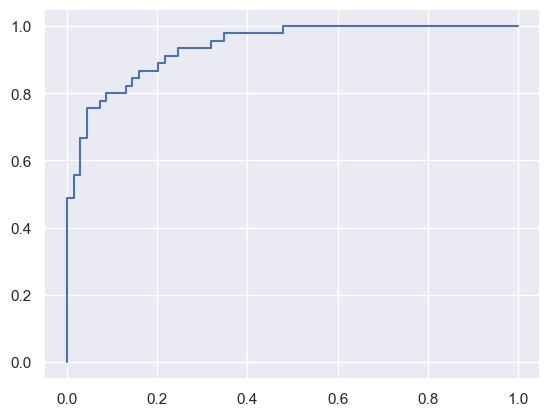

In [65]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

# Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [67]:
y_pred_NB=NBtree.predict(X_test)

In [68]:
y_pred_NB

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [69]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 90.35
F1 is: 0.87
Precision is: 0.92
Recall is: 0.82


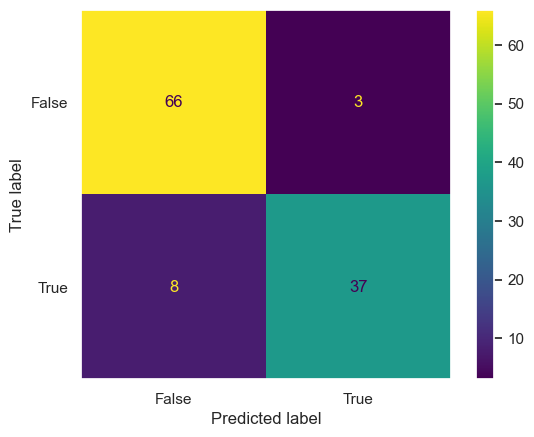

In [70]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [71]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 66
False postive: 3
False negative: 8
True postive: 37


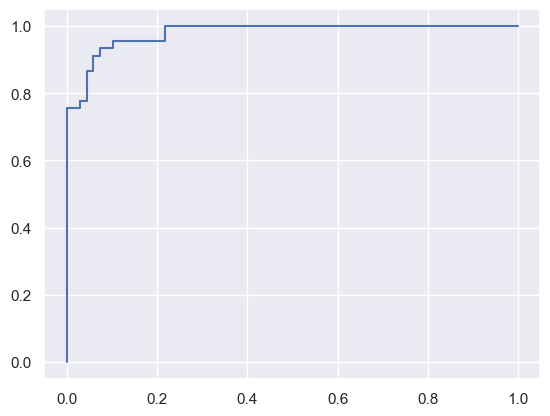

In [72]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred_KN=KNN.predict(X_test)

In [75]:
y_pred_KN

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1])

In [76]:
acc_KNN= round(accuracy_score(y_test,y_pred_KN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KN),2)
precision_KNN=round(precision_score(y_test,y_pred_KN),2)
recall_KNN=round(recall_score(y_test,y_pred_KN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 92.98
F1 is: 0.91
Precision is: 0.91
Recall is: 0.91


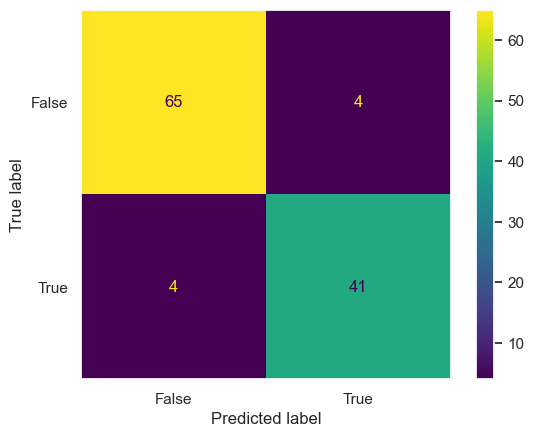

In [77]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

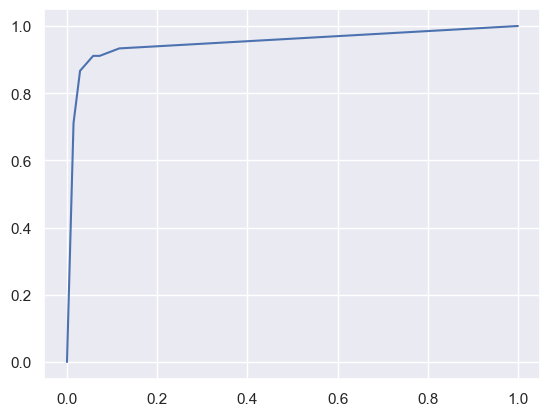

In [78]:
y_KNN_pred_prob=KNN.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred_RF=RF.predict(X_test)

In [81]:
y_pred_RF

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1])

In [82]:
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 90.35
F1 is: 0.87
Precision is: 0.92
Recall is: 0.82


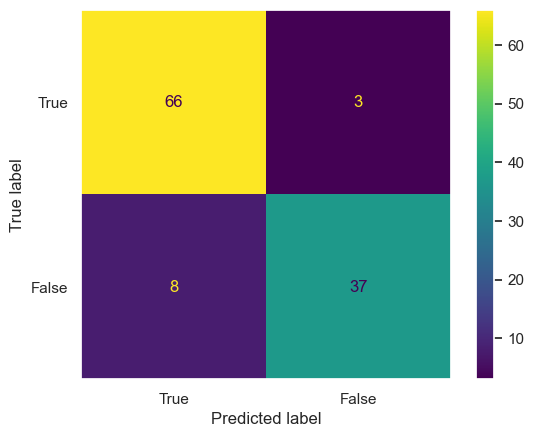

In [83]:
cmt=confusion_matrix(y_test,y_pred_RF)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[True,False])
disp.plot()
plt.grid(False)
plt.show()

In [84]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 66
False postive: 3
False negative: 8
True postive: 37


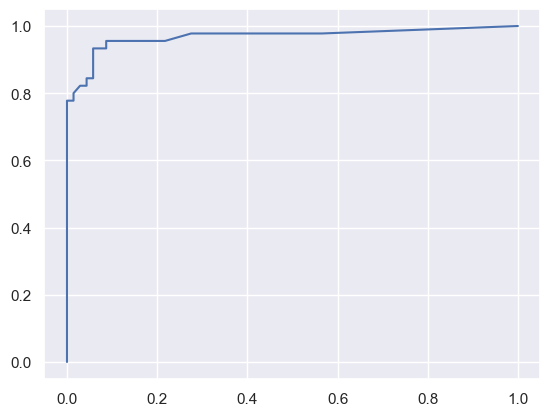

In [85]:
y_RF_pred_prob=RF.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Gradien Boosting 

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [87]:
y_pred_GB=GB.predict(X_test)

In [88]:
y_pred_GB

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1])

In [89]:
acc_GB=round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)

accuray is: 92.11
F1 is: 0.89
Precision is: 0.95
Recall is: 0.84


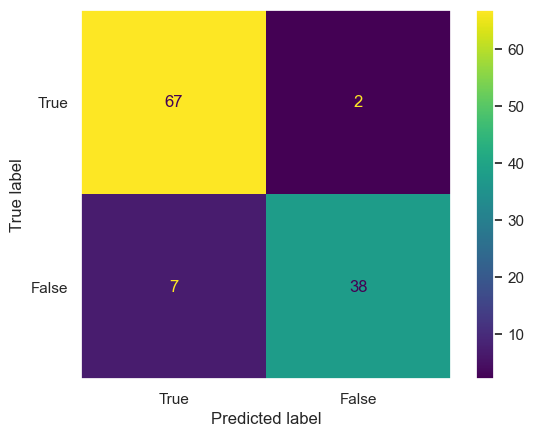

In [90]:
cmt=confusion_matrix(y_test,y_pred_GB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[True,False])
disp.plot()
plt.grid(False)
plt.show()

In [91]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 67
False postive: 2
False negative: 7
True postive: 38


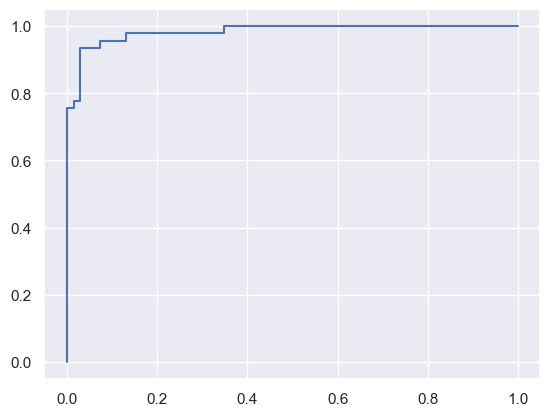

In [92]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_GB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Compairing which the model is best

In [93]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest','Gradient Boosting'])

Accuracy  Precision  Recall  F1-score
DT                    89.47       0.90    0.82      0.86
KNN                   92.98       0.91    0.91      0.91
Logistic              86.84       0.89    0.76      0.82
Naive Bayes           90.35       0.92    0.82      0.87
Random Forest         90.35       0.92    0.82      0.87
Gradient Boosting     92.11       0.95    0.84      0.89

# Model Devlope using HyperParameter tuning 

In [94]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00      537.3   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.09009         0.05892              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.09579           0.09009         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.09009         0.05892              0.15200   
568          0.09579           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                0.078710     0.3077      0.9053   
1           0.1812                0.056670     0.5435      0.7339   
2           0.2069                0.059990     0.7456      0.7869   
3           0.1783                0.061325     0.4956      1.1560   
4           0.1809                0.058830     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                0.056230     0.3077      1.2560   
565         0.1752                0.055330     0.7655      1.0750   
566         0.1590                0.056480     0.4564      1.0750   
567         0.2397                0.070160     0.7260      1.5950   
568         0.1587                0.058840     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           2.203    22.79       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    22.79       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.01952       0.05661   
4           5.438    22.79       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         2.203    22.79       0.010300         0.02891       0.05198   
565         5.203    22.79       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    22.79       0.006522         0.01952       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587     0.030030              0.006193        25.380   
1              0.01340     0.013890              0.003532        24.990   
2              0.02058     0.022500              0.004571        23.570   
3              0.01867     0.018435              0.003040        14.910   
4              0.01885     0.017560              0.005115        22.540   
..         

In [95]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [97]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [98]:
from sklearn.model_selection import GridSearchCV,cross_val_score

# Decision Tree

In [99]:
gt=DecisionTreeClassifier()
gt

DecisionTreeClassifier()

In [100]:
gt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [101]:
param_gt={
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0,42]
}

In [102]:
import time 
start=time.time()
gt_search=GridSearchCV(gt,param_gt,
                      scoring='accuracy',
                      cv=5,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [103]:
gt_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [104]:
start=time.time()
gt_search.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
total time taken is: 13.257313966751099


In [105]:
gt.fit(X_train,y_train)

DecisionTreeClassifier()

In [106]:
gt_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=42)

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=6,
                            min_samples_leaf=4,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=0)

In [108]:
gt_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 42}

In [109]:
gt_search.best_score_

0.9494505494505494

In [110]:
y_pred_gt=dtree.predict(X_test)

In [111]:
acc_gt=round(accuracy_score(y_test,y_pred_gt)*100,2)
f1_gt=round(f1_score(y_test,y_pred_gt),2)
recall_gt=round(recall_score(y_test,y_pred_gt),2)
precision_gt=round(precision_score(y_test,y_pred_gt))

print("accuracy is:",acc_gt)
print("f1 is:",f1_gt)
print("recall is:",recall_gt)
print("precision is:",precision_gt)

accuracy is: 86.84
f1 is: 0.82
recall is: 0.76
precision is: 1


In [112]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

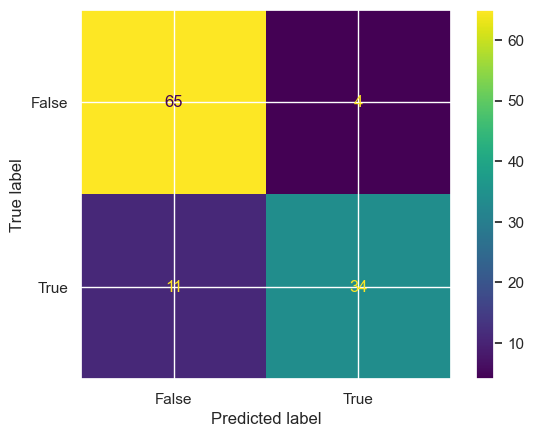

In [113]:
cmt=confusion_matrix(y_test,y_pred_gt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [114]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_gt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


True negative: 67
False postive: 4
False negative: 11
True postive: 34


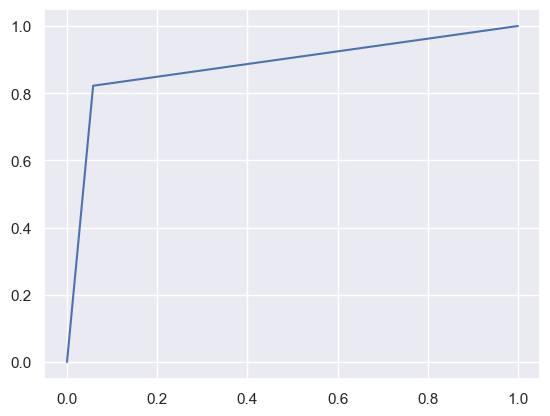

In [115]:
# ROC-AUC Curve
y_gt_pred_prob=gt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_gt_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [117]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [118]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [119]:
param_grid1={
    'C':[1.1,'entropy'],
    'intercept_scaling': [4, 5, 6, 7, 8,9],
    'fit_intercept': [True],
    'warm_start': [False],
    'max_iter': [0,41]
}

In [120]:
import time
start=time.time()
grid_search1=GridSearchCV(grid_log,param_grid1,
                         scoring='accuracy',
                         cv=4,
                         verbose=True)
end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0


In [121]:
grid_search1.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.1, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 5, 6, 7, 8, 9],
                         'max_iter': [0, 41], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [122]:
grid_search1.best_estimator_

LogisticRegression(C=1.1, intercept_scaling=4, max_iter=41)

In [123]:
grid_search1.best_score_

0.8703423381462505

In [124]:
from sklearn.linear_model import LogisticRegression
import time
logistic_regression = LogisticRegression()
start = time.time()
grid_search1.fit(X_train,y_train)
end = time.time()
print('Total time taken is:',(end-start),'seconds')

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Total time taken is: 0.689171314239502 seconds


In [126]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression(C=1.0,
                       fit_intercept=True,
                       intercept_scaling=4,
                       max_iter=42,
                       warm_start=False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

In [127]:
grid_search1.best_score_

0.8703423381462505

In [128]:
grid_search1.best_params_

{'C': 1.1,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 41,
 'warm_start': False}

In [129]:
acc_log=round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log= round(f1_score(y_test,y_pred_log),2)
recall_log=round(precision_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)

print('accuracy is:',acc_log)
print('f1 is:',f1_log)
print('recall is:',recall_log)
print('precision is:',precision_log)

accuracy is: 86.84
f1 is: 0.82
recall is: 0.89
precision is: 0.89


In [130]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

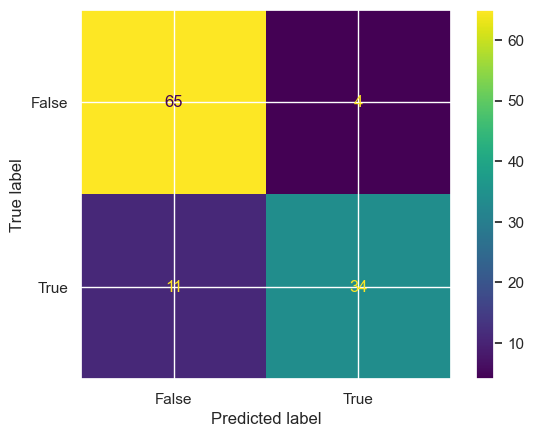

In [132]:
cmt=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [133]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 67
False postive: 4
False negative: 11
True postive: 34


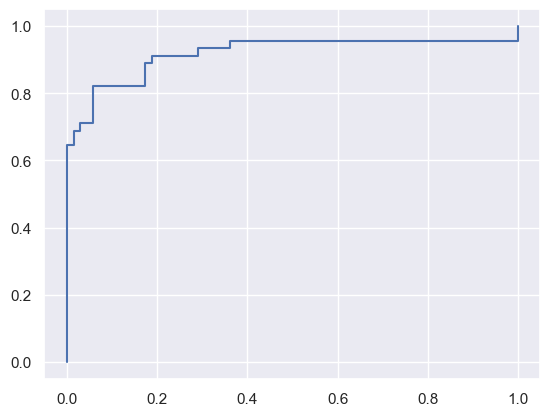

In [134]:
# ROC-AUC Curve
y_log_pred_prob=grid_search1.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [136]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_NB=GaussianNB()
grid_NB

GaussianNB()

In [138]:
grid_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [139]:
param_NB1={
    'priors':[None],
    'var_smoothing': [0.001]
}

In [141]:
import time 
start= time.time()
grid_search2=GridSearchCV(grid_NB,param_NB1,
                         scoring='accuracy',
                         cv=3,
                         verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [142]:
grid_search2

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [0.001]},
             scoring='accuracy', verbose=True)

In [143]:
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [0.001]},
             scoring='accuracy', verbose=True)

In [145]:
start=time.time()
grid_search2.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
total time taken is: 0.03397846221923828


In [146]:
grid_search2.best_estimator_

GaussianNB(var_smoothing=0.001)

In [147]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None,var_smoothing=0.001)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.001)

In [148]:
grid_search2.best_score_

0.8879400487974904

In [149]:
grid_search2.best_params_

{'priors': None, 'var_smoothing': 0.001}

In [151]:
y_pred_NB=NB.predict(X_test)

In [152]:
acc_NB=round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB))

print("accuracy is:",acc_NB)
print("f1 is:",f1_NB)
print("recall is:",recall_NB)
print("precision is:",precision_NB)

accuracy is: 90.35
f1 is: 0.87
recall is: 0.82
precision is: 1


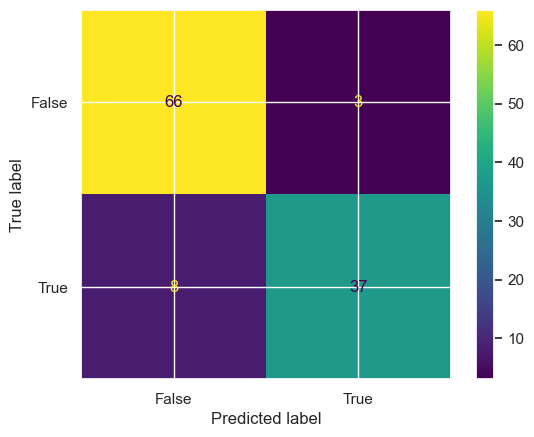

In [153]:
cmt=confusion_matrix(y_test,y_pred_NB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [154]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 67
False postive: 3
False negative: 8
True postive: 37


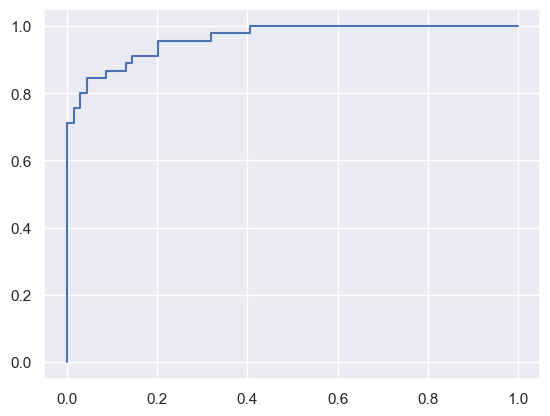

In [155]:
# ROC-AUC Curve
y_NB_pred_prob=grid_search2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [157]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()
grid_KNN

KNeighborsClassifier()

In [158]:
grid_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [159]:
param_KNN={
    'n_neighbors': [3,4,5,6],
    'leaf_size': [34,12],
    'algorithm':['auto','ball_tree','kd_tree','brute']
    
}

In [160]:
import time
start=time.time()
grid_search3=GridSearchCV(grid_KNN,param_KNN,
                         scoring='accuracy',
                         cv=3,
                         verbose=True)
end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0


In [161]:
grid_search3

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [34, 12], 'n_neighbors': [3, 4, 5, 6]},
             scoring='accuracy', verbose=True)

In [162]:
start=time.time()
grid_search3.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
total time taken is: 4.270273447036743


In [163]:
grid_search3.best_estimator_

KNeighborsClassifier(leaf_size=34, n_neighbors=6)

In [164]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=12)
KN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [165]:
grid_search3.best_score_

0.9252933658649937

In [166]:
grid_search3.best_params_

{'algorithm': 'auto', 'leaf_size': 34, 'n_neighbors': 6}

In [167]:
y_pred_KNN=KN.predict(X_test)

In [168]:
# Matrix
acc_KNN=round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN))

print("accuracy is:",acc_KNN)
print("f1 is:",f1_KNN)
print("recall is:",recall_KNN)
print("precision is:",precision_KNN)

accuracy is: 92.98
f1 is: 0.91
recall is: 0.91
precision is: 1


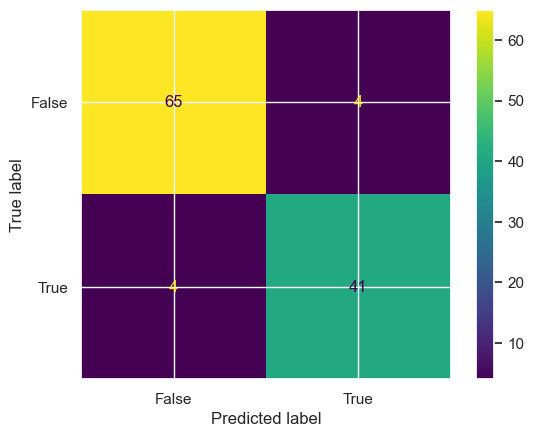

In [169]:
cmt=confusion_matrix(y_test,y_pred_KNN)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [170]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 67
False postive: 4
False negative: 4
True postive: 41


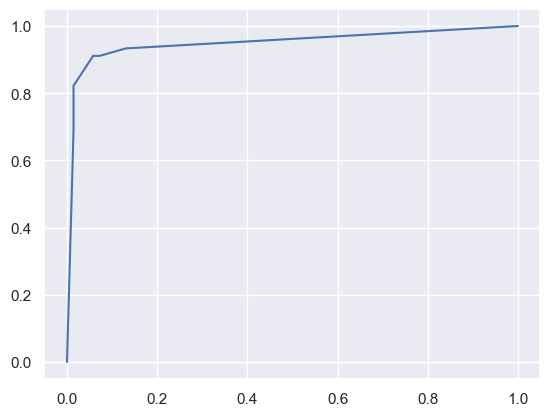

In [171]:
# ROC-AUC Curve
y_KNN_pred_prob=grid_search3.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob)
plt.plot(fpr,tpr)
plt.show()

# Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier()

In [173]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()
grid_RF

RandomForestClassifier()

In [174]:
grid_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [175]:
param_RF={
    'min_samples_leaf': [3,4,5,6],
    'oob_score': [False],
    'criterion':['gini']
    
}

In [176]:
import time
start=time.time()
grid_search4=GridSearchCV(grid_RF,param_RF,
                         scoring='accuracy',
                         cv=4,
                         verbose=True)
end=time.time()
print('total time taken is :',(end-start))

total time taken is : 0.0


In [177]:
grid_search4

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'oob_score': [False]},
             scoring='accuracy', verbose=True)

In [178]:
start=time.time()
grid_search4.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
total time taken is: 4.275911092758179


In [179]:
grid_search4.best_estimator_

RandomForestClassifier(min_samples_leaf=4)

In [181]:
from sklearn.ensemble import RandomForestClassifier
RFTree=RandomForestClassifier(criterion='gini',
                             max_depth=5,
                             max_features='sqrt',
                             n_estimators=100,
                             random_state=0)
RFTree.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [182]:
grid_search4.best_score_

0.9603904673187393

In [183]:
grid_search4.best_params_

{'criterion': 'gini', 'min_samples_leaf': 4, 'oob_score': False}

In [184]:
y_pred_RF=RFTree.predict(X_test)

In [185]:
acc_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF))

print("accuracy is:",acc_RF)
print("f1 is:",f1_RF)
print("recall is:",recall_RF)
print("precision is:",precision_RF)

accuracy is: 90.35
f1 is: 0.87
recall is: 0.82
precision is: 1


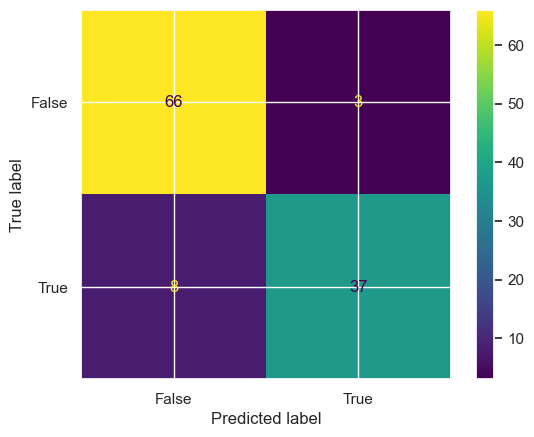

In [186]:
cmt=confusion_matrix(y_test,y_pred_RF)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [187]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 67
False postive: 3
False negative: 8
True postive: 37


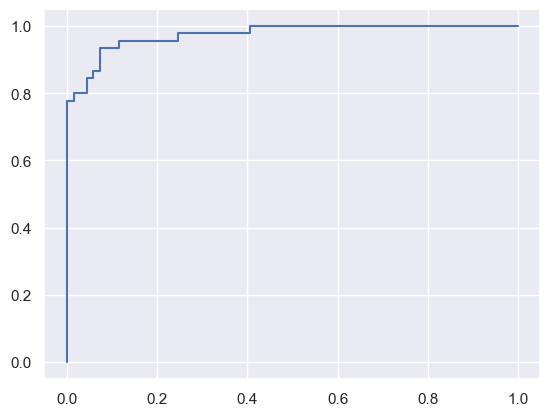

In [188]:
# ROC-AUC Curve
y_RF_pred_prob=grid_search4.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [189]:
dict1={'Accuracy':[acc_gt,acc_KNN,acc_log,acc_NB,acc_RF],
      'precision':[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      'recall':[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      'f1-score':[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}
pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

Accuracy  precision  recall  f1-score
DT                86.84       0.90    0.82      0.86
KNN               92.98       1.00    0.91      0.91
Logistic          86.84       0.89    0.89      0.82
Naive Bayes       90.35       1.00    0.82      0.87
Random Forest     90.35       1.00    0.82      0.87

# Documentation

- The Breast Cancer Wisconsin (Diagnostic) dataset (often abbreviated as BCW or BCWD) is another well-known dataset commonly used in machine learning for classification tasks, particularly in the context of breast cancer diagnosis. The dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast masses, which were then used to create a diagnostic model.

- 1)ID: Patient ID.
- 2)Diagnosis: The diagnosis of breast tissues (M = malignant, B = benign).
- 3)Mean Radius: Mean of distances from center to points on the perimeter.
- 4)Mean Texture: Standard deviation of gray-scale values.
- 5)Mean Perimeter: Mean size of the core tumor.
- 6)Mean Area: Mean area of the core tumor.
- 7)Mean Smoothness: Mean of local variation in radius lengths.
- 8)Mean Compactness: Mean of perimeter^2 / area - 1.0.
- 9)Mean Concavity: Mean of severity of concave portions of the contour.
- 10)Mean Concave Points: Mean for number of concave portions of the contour.
- 11)Mean Symmetry: Mean symmetry.
- 12)Mean Fractal Dimension: Mean of "coastline approximation" - 1.
- 13)SE Radius: Standard error of the mean of distances from center to points on the perimeter.
- 14)SE Texture: Standard error of gray-scale values.
- 15)SE Perimeter: Standard error of the size of the core tumor.
- 16)SE Area: Standard error of the area of the core tumor.
- 17)SE Smoothness: Standard error of local variation in radius lengths.
- 18)SE Compactness: Standard error of perimeter^2 / area - 1.0.
- 19)SE Concavity: Standard error of severity of concave portions of the contour.
- 20)SE Concave Points: Standard error for number of concave portions of the contour.
- 21)SE Symmetry: Standard error for symmetry.
- 22)SE Fractal Dimension: Standard error for "coastline approximation" - 1.
- 23)Worst Radius: "Worst" or largest mean value for radius.
- 24)Worst Texture: "Worst" or largest mean value for texture.
- 25)Worst Perimeter: "Worst" or largest mean value for perimeter.
- 26)Worst Area: "Worst" or largest mean value for area.
- 27)Worst Smoothness: "Worst" or largest mean value for smoothness.
- 28)Worst Compactness: "Worst" or largest mean value for compactness.
- 29)Worst Concavity: "Worst" or largest mean value for concavity.
- 30)Worst Concave Points: "Worst" or largest mean value for concave points.
- 31)Worst Symmetry: "Worst" or largest mean value for symmetry.
- 32)Worst Fractal Dimension: "Worst" or largest mean value for fractal dimension.